<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Communication Systems
</font>
<hr/>
<font color="#800080" size=5>
Assignment 3 
<br>
</font>
<font size=5>
Instructor: Dr. Pakravan
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: Bahman 12, 1403 at 23:59
</font>
<hr>
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram : @Ali99os
</font>
<br>
<hr>
</div></font>

In [65]:
Name = "Amirali Rajaee"
StudentId = "401101716"

# Import Libraries 

In [168]:
### add your libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import signal
from scipy.signal import welch
from scipy.signal import butter, lfilter, filtfilt

# Question 1

### Signal Sampling and Reconstruction with Sinc Functions  

In this part, we’ll delve into an essential concept in signal processing: **sampling and reconstructing signals using sinc interpolation**. The aim is to understand how signals can be sampled, reconstructed from discrete data points, and how the reconstruction is influenced by using an **ideal sinc function** versus a **limited sinc function**.  

---

### **What You Need to Do**  

1. **Define Your Signal**  
   - Write a function $ f(t) $ to represent your continuous signal.  
   - Feel free to choose a signal that excites your curiosity—a sine wave, a square wave, or even your custom creation.  

2. **Sample the Signal**  
   - Create a function that takes the continuous signal and samples it at a specified **sampling rate**.  
   - The function should output the sampled time points and the corresponding signal values.  

3. **Reconstruct the Signal**  
   - Implement two reconstruction functions:  
     - **Ideal Sinc Interpolation**: A perfect reconstruction using the standard sinc function.  
     - **Limited Sinc Interpolation**: A practical reconstruction with sinc pulses restricted in range.  
   - Reconstruct the signal across the original time vector using both methods.  

4. **Calculate Reconstruction Error**  
   - Compute the **Mean Squared Error (MSE)** to measure the difference between the original and reconstructed signals.  
   - Compare the errors for ideal and limited sinc interpolations.  

5. **Visualize Your Work**  
   - Plot the following:  
     - The original signal alongside the sampled points and reconstructed signals (for both ideal and limited sinc methods).  
     - Individual sinc pulse contributions to the reconstruction process for both methods.  

### Generating Signal And Plotting It

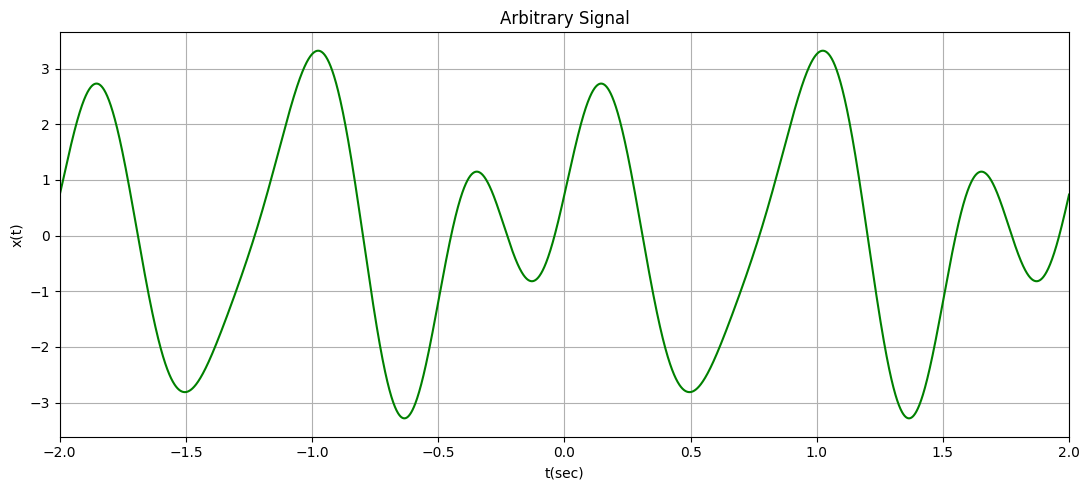

In [169]:
def my_signal(x):
    return 2*np.cos(2*np.pi*x) + np.sin(4*np.pi*x) + 1.5*np.sin(3*np.pi*x - 1)

t = np.linspace(-2,2,4000)
my_Signal = np.zeros(t.shape[0])

for i in range(t.shape[0]):
    my_Signal[i] = my_signal(t[i])

plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='green')
plt.title('Arbitrary Signal')
plt.xlabel('t(sec)')
plt.ylabel('x(t)')
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

### Sampling The Signal

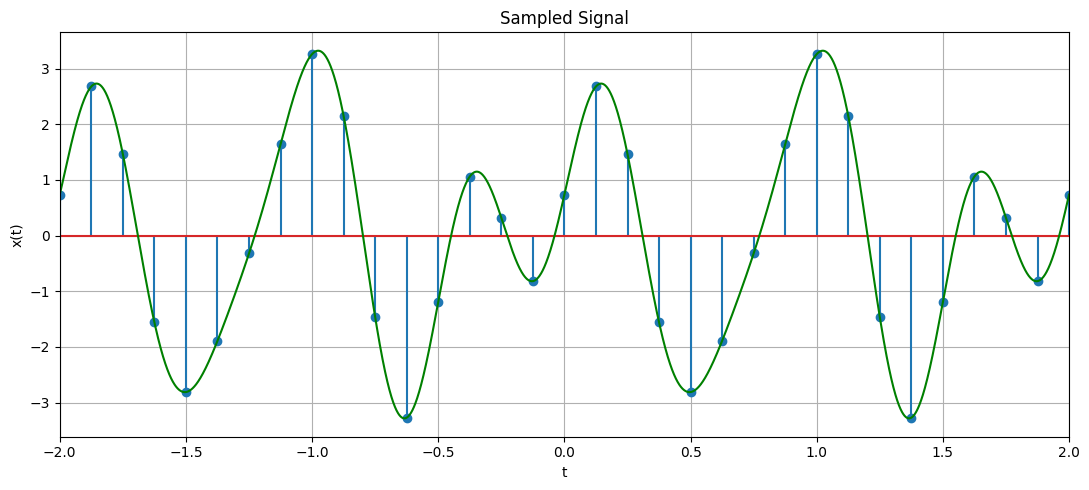

In [170]:
Fs = 8

def sample(fs):
    samples = np.linspace(-2,2,int(4*fs+1))
    sampled_signal = np.zeros(samples.shape[0])
    for i in range(samples.shape[0]):
        sampled_signal[i] = my_signal(samples[i])

    return samples , sampled_signal
    
my_samples , my_sampled_signal = sample(Fs)

plt.figure(figsize=(11,5))
plt.stem(my_samples,my_sampled_signal)
plt.plot(t,my_Signal,color='green')
plt.title('Sampled Signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

### Reconstruction Using Ideal Sinc Pulses

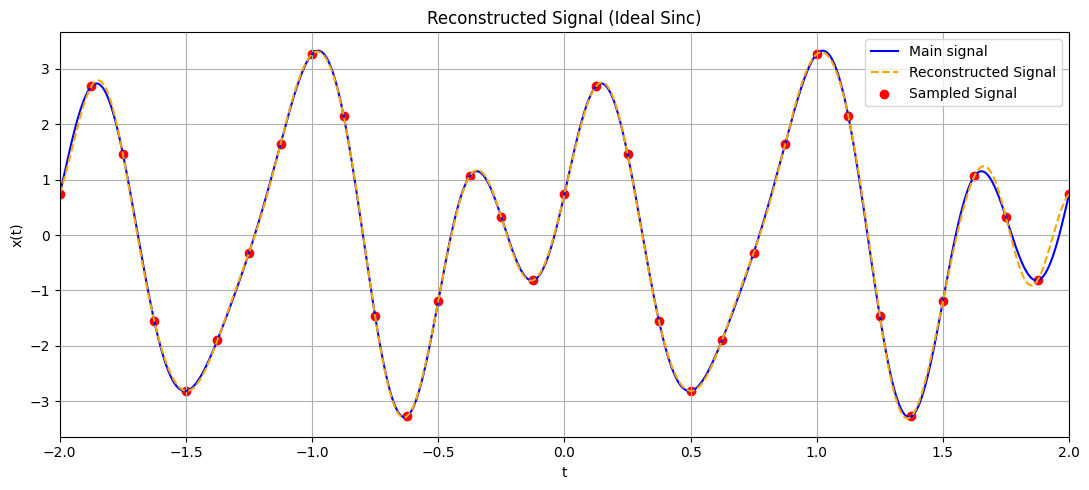

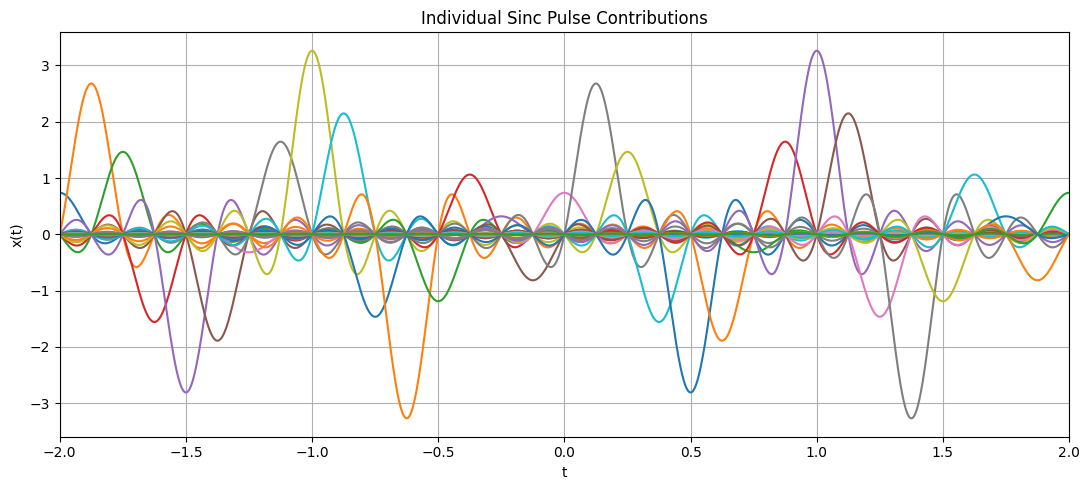

In [171]:
def ideal_sinc_reconstruction(samples,sampled_signal,x,fs):
    y = 0
    for i in range(samples.shape[0]):
        y += sampled_signal[i] * np.sinc(fs*x - samples[i]*fs)

    return y

t = np.linspace(-2,2,4000)
ideal_reconstructed_signal = np.zeros(t.shape[0])
for i in range(t.shape[0]):
    ideal_reconstructed_signal[i] = ideal_sinc_reconstruction(my_samples,my_sampled_signal,t[i],Fs)

plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='blue')
plt.plot(t,ideal_reconstructed_signal,'--',c='orange')
plt.scatter(my_samples,my_sampled_signal,c="red")
plt.title('Reconstructed Signal (Ideal Sinc)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Main signal','Reconstructed Signal','Sampled Signal'])
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
for i in range(my_samples.shape[0]):
    plt.plot(t,my_sampled_signal[i]*np.sinc(Fs*t - my_samples[i]*Fs))

plt.title('Individual Sinc Pulse Contributions')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-2,2)
             
plt.tight_layout()
plt.show()

### Reconstruction Using Limited Sinc Pulses

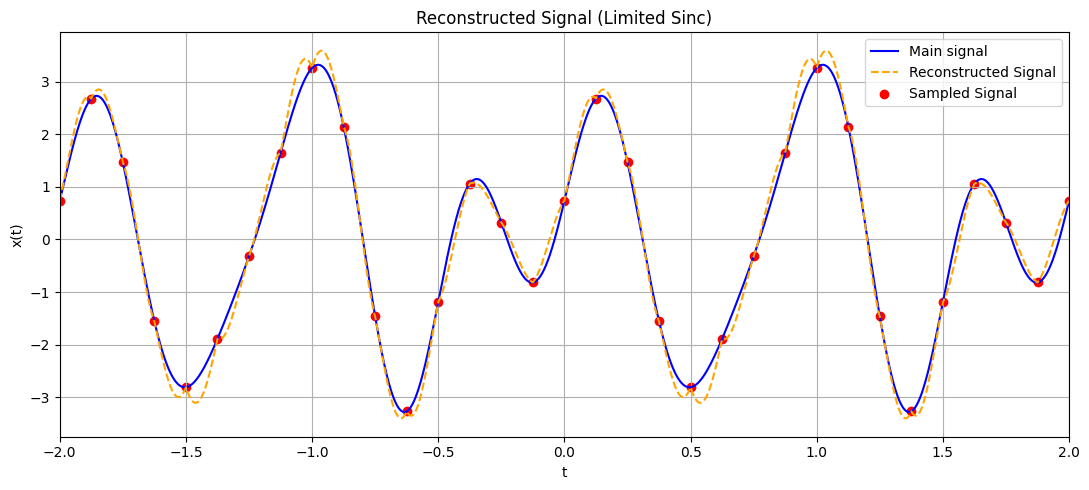

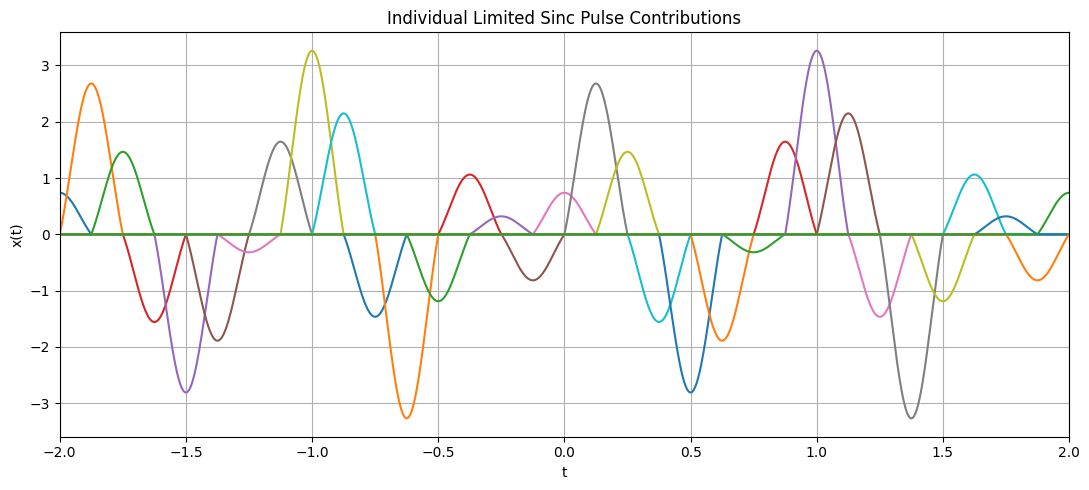

In [172]:
def limited_sinc1(x):
    if (x<=1 and x>=-1):
        return np.sinc(x)
        
    return 0

def limited_sinc2(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if (x[i]<=1 and x[i]>=-1):
            y[i] = np.sinc(x[i])
        
    return y
    
def limited_sinc_reconstruction(samples,sampled_signal,x,fs):
    y = 0
    for i in range(samples.shape[0]):
        y += sampled_signal[i] * limited_sinc1(fs*x - samples[i]*fs)

    return y

t = np.linspace(-2,2,4000)
limited_reconstructed_signal = np.zeros(t.shape[0])
for i in range(t.shape[0]):
    limited_reconstructed_signal[i] = limited_sinc_reconstruction(my_samples,my_sampled_signal,t[i],Fs)

plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='blue')
plt.plot(t,limited_reconstructed_signal,'--',c='orange')
plt.scatter(my_samples,my_sampled_signal,c="red")
plt.title('Reconstructed Signal (Limited Sinc)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Main signal','Reconstructed Signal','Sampled Signal'])
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
for i in range(my_samples.shape[0]):
    plt.plot(t,my_sampled_signal[i]*limited_sinc2(Fs*t - my_samples[i]*Fs))

plt.title('Individual Limited Sinc Pulse Contributions')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-2,2)
             
plt.tight_layout()
plt.show()

### Calculating MSE

In [173]:
mse1 = mean_squared_error(my_Signal,ideal_reconstructed_signal)
mse2 = mean_squared_error(my_Signal,limited_reconstructed_signal)
print(f"MSE for ideal reconstruction: {mse1}")
print(f"MSE for limited reconstruction: {mse2}")

MSE for ideal reconstruction: 0.004439447897963114
MSE for limited reconstruction: 0.039475392588815


Quantize and reconstruct your signal to evaluate the effectiveness of different interpolation methods in restoring the original signal after quantization. Follow the steps outlined below to complete the analysis, comparing **uniform quantization** and **non-uniform quantization** for their impact on reconstruction accuracy:

1. **Quantizing the Signal**:  
   - Use **n bits** for quantization, where the signal is mapped to $2^n$ discrete levels.  
   - Perform quantization using two approaches:  
     - **Uniform Quantization**: Divide the dynamic range of the signal into equally spaced levels.  
     - **Non-Uniform Quantization**: Use logarithmic or other scaling methods to allocate finer resolution to smaller amplitudes and coarser resolution to larger amplitudes.  
   - Quantize the sampled signal using the appropriate `quantize_signal` function for each method.

2. **Reconstructing the Signal**:  
   - Reconstruct the quantized signal using the `reconstruct_signal` function with:  
     - **Ideal sinc interpolation**: A theoretical reconstruction using the sinc function.  
     - **Limited sinc interpolation**: A practical reconstruction method that truncates the sinc function.  
   - Measure the accuracy of each reconstruction by calculating the **Mean Squared Error (MSE)** relative to the original signal for both quantization methods.

3. **Visualizing the Results**:  
   - Create comparative plots showing:  
     - The **original signal** as a continuous blue line.  
     - The **uniformly quantized signal** as red points.  
     - The **non-uniformly quantized signal** as magenta points.  
     - The **reconstructed signals** using both interpolation methods as dashed lines in different colors for uniform and non-uniform quantization.

4. **Analyzing Results**:  
   - Compare the impact of **uniform vs. non-uniform quantization** on reconstruction accuracy.  
   - Discuss which **interpolation method** (ideal or limited sinc) is more robust to quantization errors.  
   - Reflect on how quantization affects the overall reconstruction quality and what trade-offs are introduced by using non-uniform quantization.


### Uniform Quantization

In [174]:
n = 3

def uniform_quantization(n,signal):
    max = np.max(np.abs(signal))
    q = 2*max / (pow(2,n))
    y = q * np.round(signal/q)

    return y

uniformly_quantized_signal = uniform_quantization(n,my_sampled_signal)

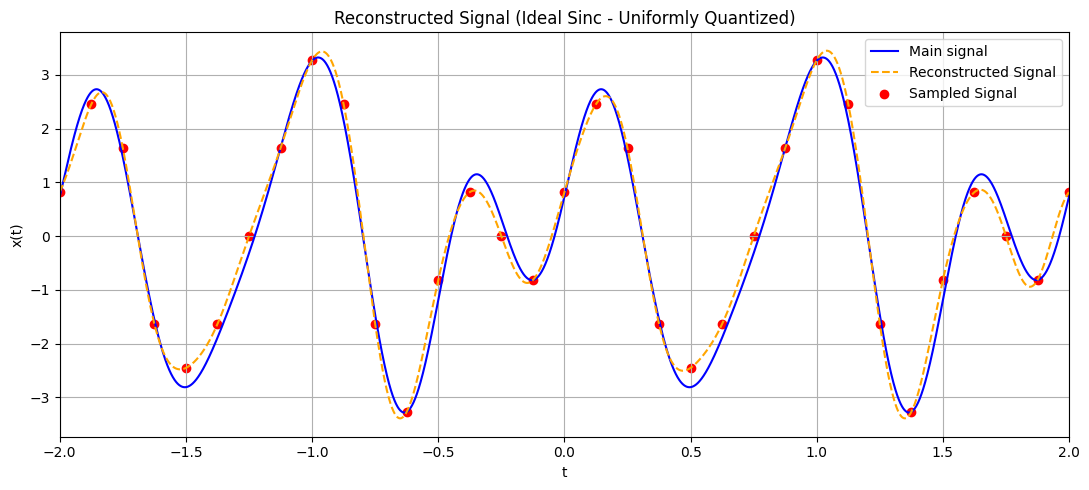

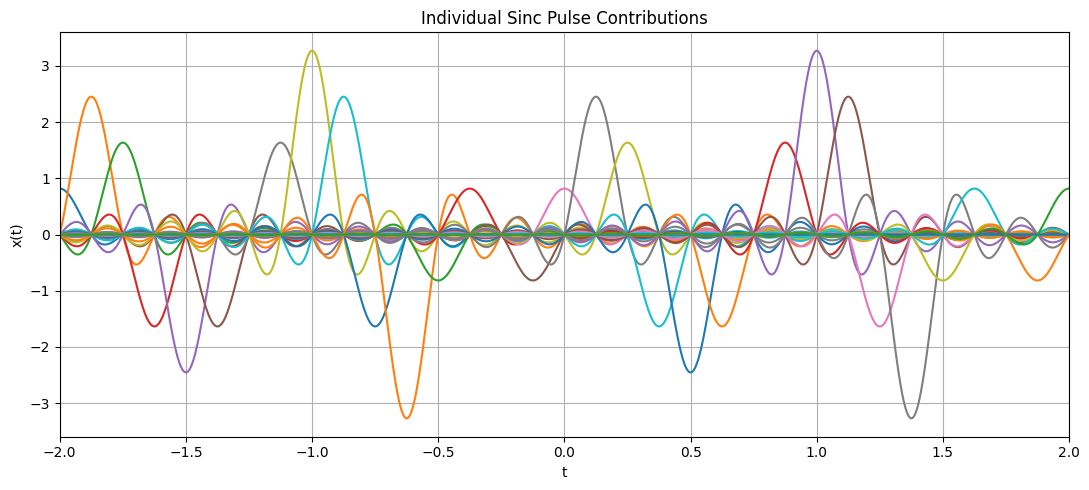

In [175]:
t = np.linspace(-2,2,4000)
ideal_reconstructed_uniformly_quantized_signal = np.zeros(t.shape[0])
for i in range(t.shape[0]):
    ideal_reconstructed_uniformly_quantized_signal[i] = ideal_sinc_reconstruction(my_samples,uniformly_quantized_signal,t[i],Fs)

plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='blue')
plt.plot(t,ideal_reconstructed_uniformly_quantized_signal,'--',c='orange')
plt.scatter(my_samples,uniformly_quantized_signal,c="red")
plt.title('Reconstructed Signal (Ideal Sinc - Uniformly Quantized)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Main signal','Reconstructed Signal','Sampled Signal'])
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
for i in range(my_samples.shape[0]):
    plt.plot(t,uniformly_quantized_signal[i]*np.sinc(Fs*t - my_samples[i]*Fs))

plt.title('Individual Sinc Pulse Contributions')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-2,2)
             
plt.tight_layout()
plt.show()

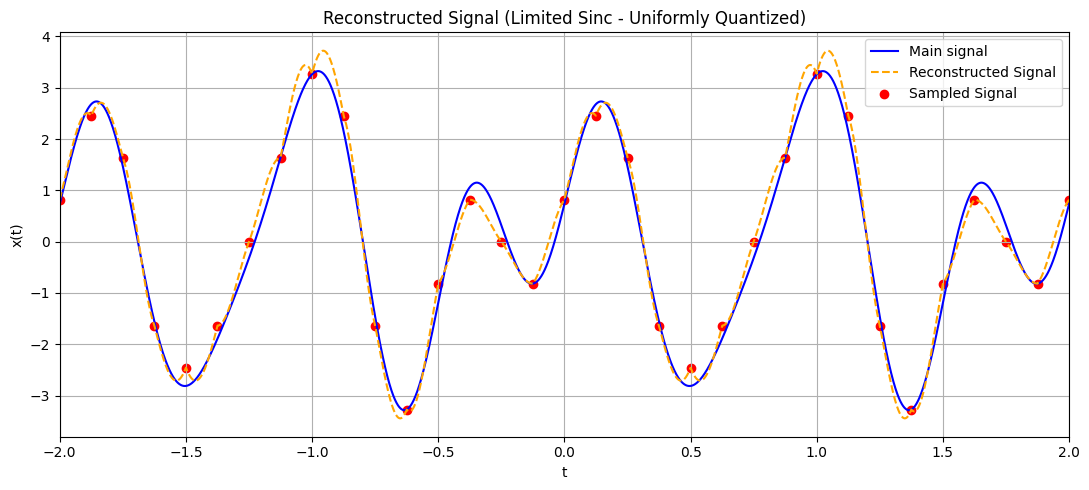

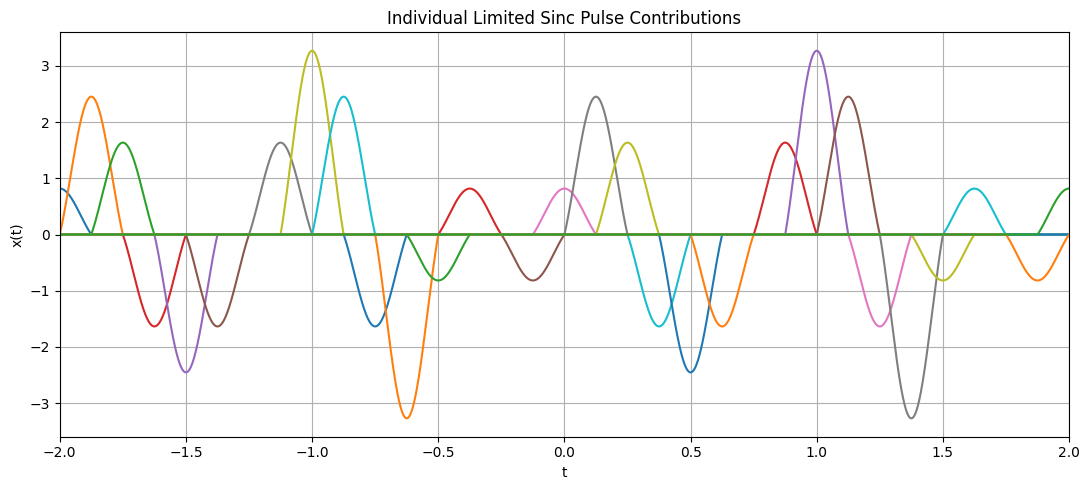

In [176]:
t = np.linspace(-2,2,4000)
limited_reconstructed_uniformly_quantized_signal = np.zeros(t.shape[0])
for i in range(t.shape[0]):
    limited_reconstructed_uniformly_quantized_signal[i] = limited_sinc_reconstruction(my_samples,uniformly_quantized_signal,t[i],Fs)

plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='blue')
plt.plot(t,limited_reconstructed_uniformly_quantized_signal,'--',c='orange')
plt.scatter(my_samples,uniformly_quantized_signal,c="red")
plt.title('Reconstructed Signal (Limited Sinc - Uniformly Quantized)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Main signal','Reconstructed Signal','Sampled Signal'])
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
for i in range(my_samples.shape[0]):
    plt.plot(t,uniformly_quantized_signal[i]*limited_sinc2(Fs*t - my_samples[i]*Fs))

plt.title('Individual Limited Sinc Pulse Contributions')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-2,2)
             
plt.tight_layout()
plt.show()

### Non-Uniform Quantization

In [177]:
mu = 1

def mu_law_companding(signal,mu):
    
    normalized_signal = signal / np.max(np.abs(signal))
    y = np.log(1+mu*np.abs(normalized_signal)) / np.log(1+mu) * np.sign(normalized_signal)
    y *= np.max(np.abs(signal))

    return y

companded_signal = mu_law_companding(my_sampled_signal,mu)
nonuniformly_quantized_signal = uniform_quantization(n,companded_signal)

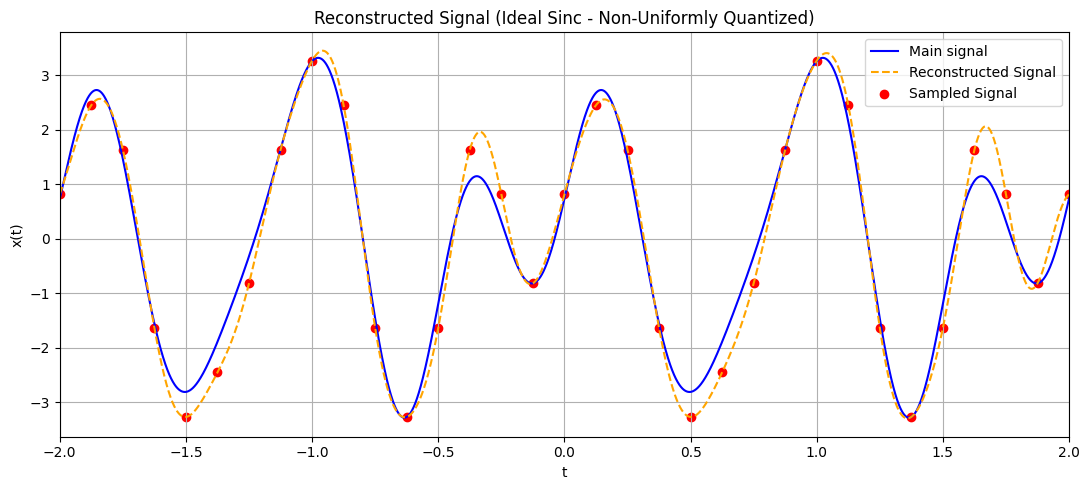

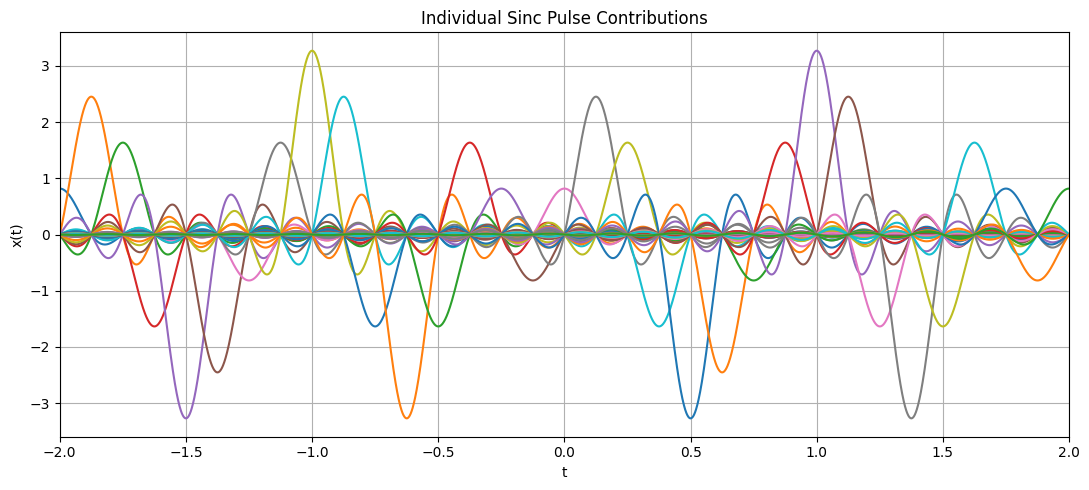

In [178]:
t = np.linspace(-2,2,4000)
ideal_reconstructed_nonuniformly_quantized_signal = np.zeros(t.shape[0])
for i in range(t.shape[0]):
    ideal_reconstructed_nonuniformly_quantized_signal[i] = ideal_sinc_reconstruction(my_samples,nonuniformly_quantized_signal,t[i],Fs)
    
plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='blue')
plt.plot(t,ideal_reconstructed_nonuniformly_quantized_signal,'--',c='orange')
plt.scatter(my_samples,nonuniformly_quantized_signal,c="red")
plt.title('Reconstructed Signal (Ideal Sinc - Non-Uniformly Quantized)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Main signal','Reconstructed Signal','Sampled Signal'])
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
for i in range(my_samples.shape[0]):
    plt.plot(t,nonuniformly_quantized_signal[i]*np.sinc(Fs*t - my_samples[i]*Fs))

plt.title('Individual Sinc Pulse Contributions')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-2,2)
             
plt.tight_layout()
plt.show()

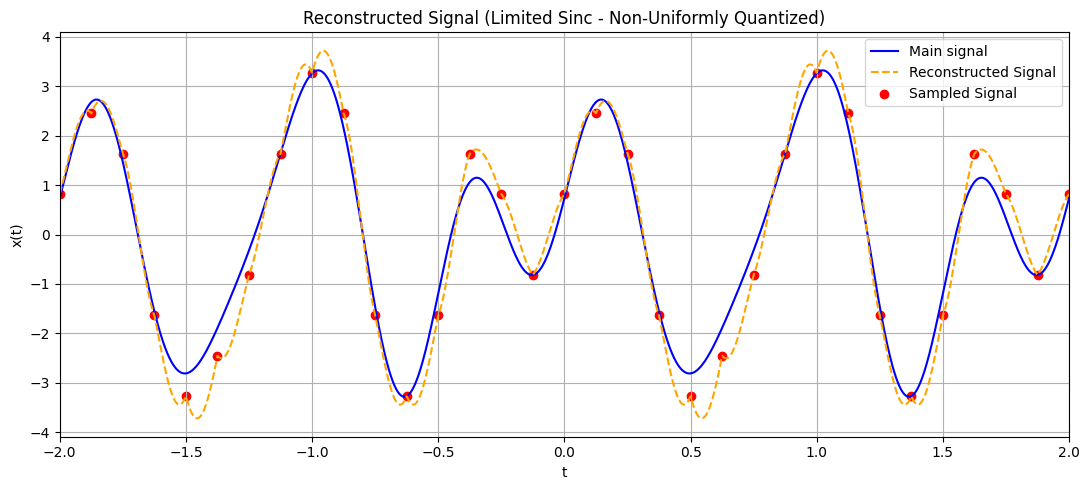

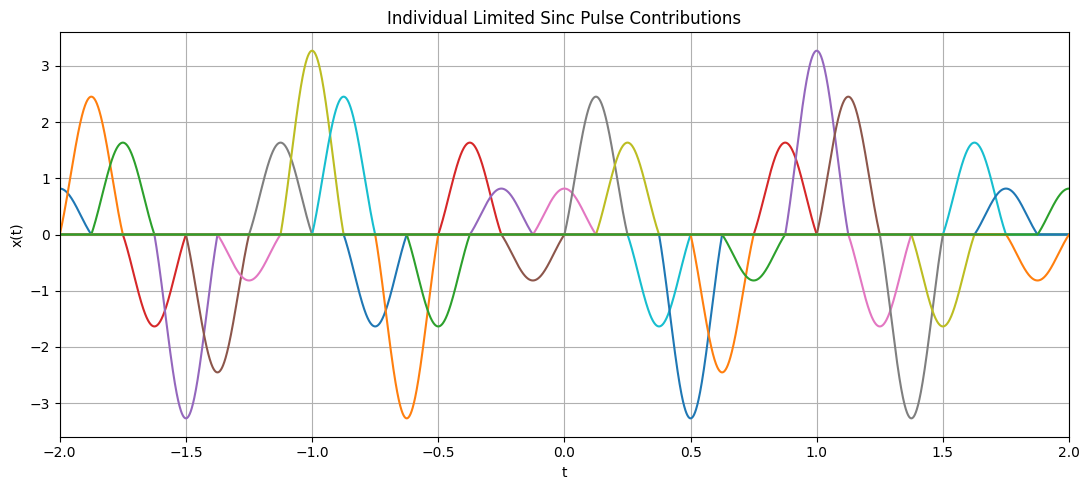

In [179]:
t = np.linspace(-2,2,4000)
limited_reconstructed_nonuniformly_quantized_signal = np.zeros(t.shape[0])
for i in range(t.shape[0]):
    limited_reconstructed_nonuniformly_quantized_signal[i] = limited_sinc_reconstruction(my_samples,nonuniformly_quantized_signal,t[i],Fs)

plt.figure(figsize=(11,5))
plt.plot(t,my_Signal,color='blue')
plt.plot(t,limited_reconstructed_nonuniformly_quantized_signal,'--',c='orange')
plt.scatter(my_samples,nonuniformly_quantized_signal,c="red")
plt.title('Reconstructed Signal (Limited Sinc - Non-Uniformly Quantized)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Main signal','Reconstructed Signal','Sampled Signal'])
plt.grid(True)
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,5))
for i in range(my_samples.shape[0]):
    plt.plot(t,nonuniformly_quantized_signal[i]*limited_sinc2(Fs*t - my_samples[i]*Fs))

plt.title('Individual Limited Sinc Pulse Contributions')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-2,2)
             
plt.tight_layout()
plt.show()

### Calculating MSE

In [180]:
mse1 = mean_squared_error(my_Signal,ideal_reconstructed_uniformly_quantized_signal)
mse2 = mean_squared_error(my_Signal,limited_reconstructed_uniformly_quantized_signal)
mse3 = mean_squared_error(my_Signal,ideal_reconstructed_nonuniformly_quantized_signal)
mse4 = mean_squared_error(my_Signal,limited_reconstructed_nonuniformly_quantized_signal)
print(f"MSE for ideal reconstruction - uniformly quantized: {mse1}")
print(f"MSE for limited reconstruction - uniformly quantized: {mse2}")
print(f"MSE for ideal reconstruction - nonuniformly quantized: {mse3}")
print(f"MSE for limited reconstruction - nonuniformly quantized: {mse4}")

MSE for ideal reconstruction - uniformly quantized: 0.05343397886240938
MSE for limited reconstruction - uniformly quantized: 0.06163449449687406
MSE for ideal reconstruction - nonuniformly quantized: 0.11642234945934954
MSE for limited reconstruction - nonuniformly quantized: 0.20259991780611286


# Question 2


Transmitting a message using **64-QAM (Quadrature Amplitude Modulation)** involves encoding information into 64 unique symbols by adjusting both the amplitude and phase of a carrier wave. This approach is highly efficient, as each symbol can carry 6 bits of data. The goal is to design and evaluate a 64-QAM system while considering the impact of different noise levels.  

The process is as follows:  

---

#### 1. **Understanding 64-QAM Transmission**  
To transmit a message, start by converting the message string into a binary sequence (a stream of bits). Since each 64-QAM symbol carries 6 bits:  
- Divide the bit stream into groups of 6 bits.  
- Map these 6 bits into two components using an **8-level Pulse Amplitude Modulation (PAM):**  
  - The first 3 bits determine the amplitude of the **in-phase (I)** component.  
  - The next 3 bits determine the amplitude of the **quadrature (Q)** component.  

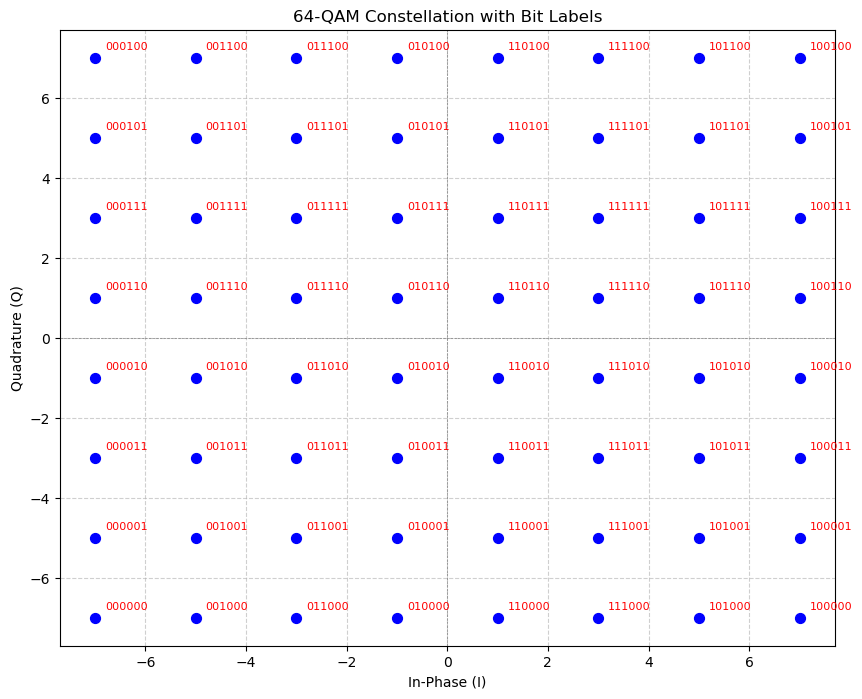

Next, the in-phase and quadrature components are modulated:  
- Multiply the in-phase component by a cosine wave (`cos(2πft)`).  
- Multiply the quadrature component by a sine wave (`sin(2πft)`).  
- Add these two components together to form the final modulated signal.  

At this stage, the signal is ready for transmission.  

---

#### 2. **Adding Noise and Evaluating Signal Quality**  
To simulate real-world conditions, introduce **Additive White Gaussian Noise (AWGN)** to the modulated signal. Test the system at various **Signal-to-Noise Ratios (SNRs):**  
- Use SNR values of **20 dB**, **10 dB**, **0 dB**, and **-10 dB**.  

This step is crucial to analyze how noise affects the performance of the 64-QAM system.  

---

#### 3. **Receiving and Demodulating the Signal**  
At the receiver, process the modulated signal to recover the transmitted data:  
- Apply a **bandpass filter** to isolate the desired signal.  
- Multiply the filtered signal by sine and cosine carriers to separate the quadrature and in-phase components.  
- Use a **low-pass filter** to retrieve the baseband signals for I and Q.  
- **Sample the signals** to obtain discrete points corresponding to the transmitted amplitudes.  

---

#### 4. **Classifying and Reconstructing Data**  
Once the in-phase and quadrature components have been sampled:  
- Use **thresholding** or a **clustering algorithm** to classify the sampled points into one of the 64 possible symbols.  
- Convert the classified symbols back into their corresponding bits to reconstruct the original message.  

---

#### 5. **Analyzing the System’s Performance**  
To evaluate the system:  
1. Compare the received bits to the original transmitted bits and determine how many were decoded correctly. Calculate the **number of symbol errors** or mismatches.  
2. **Visualize the sampled data:**  
   - Plot the received I-Q samples.  
   - Clearly label the correctly classified symbols with their respective classes.  
   - Highlight any misclassified symbols in a distinct color.  
3. Discuss the relationship between noise levels and classification accuracy, emphasizing how the error rate and misclassified symbols change as the SNR decreases.  


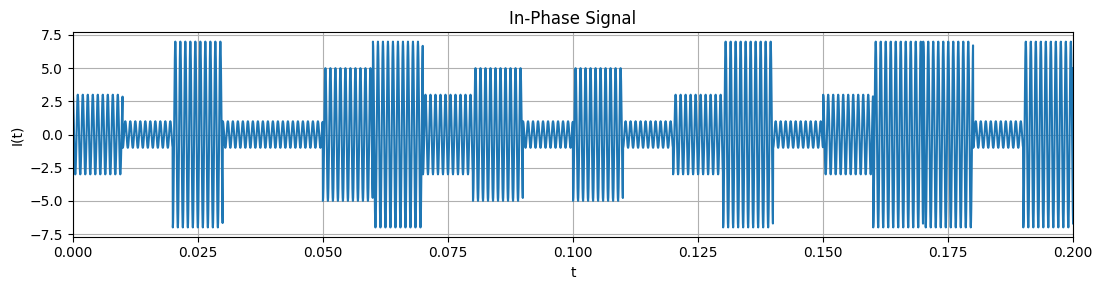

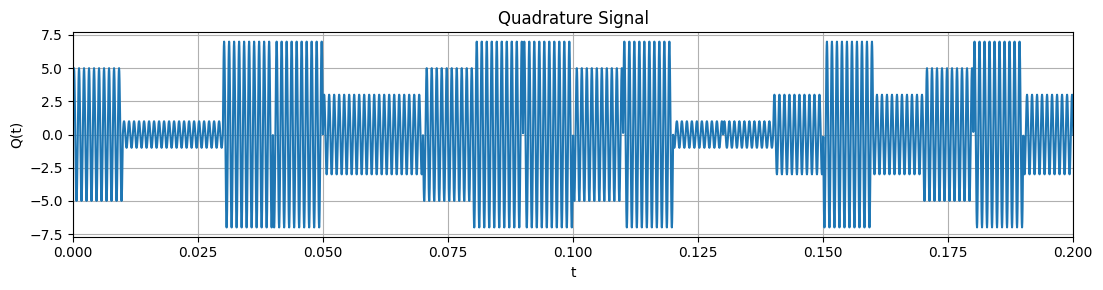

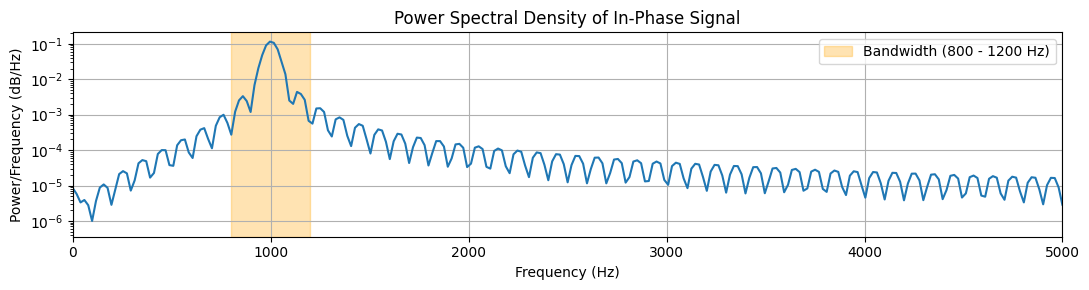

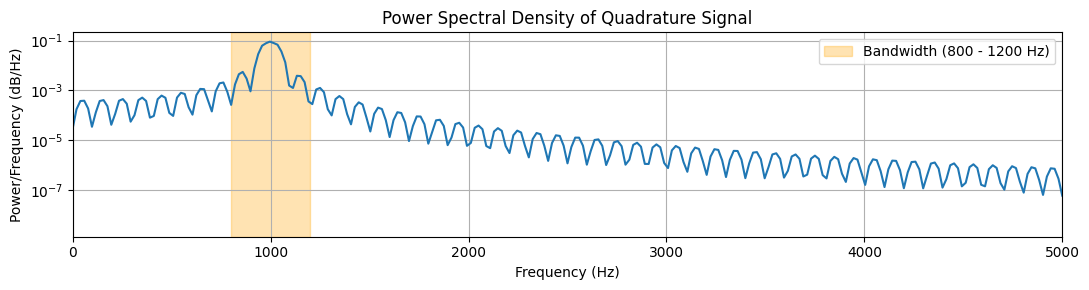

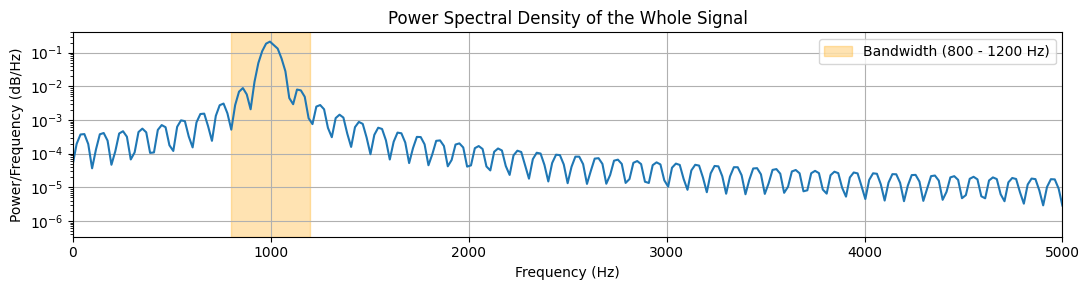

The total power of signal is 21.079789610752503W --> 13.238662720364669dB 


In [182]:
message = np.random.randint(0,2,1200)  # 1200 / 6 = 200 symbols
fc = 1000
Ts = 0.01  # symbol rate
modulated_signal = 0
I_modulated_signal = 0
Q_modulated_signal = 0
t = np.linspace(0,2,int(4e4))
fs = 20000

def find_I_Q(symbol):
    if (symbol[0:3] == [0,0,0]).all():
        I = -7
    elif (symbol[0:3] == [0,0,1]).all():
        I = -5
    elif (symbol[0:3] == [0,1,1]).all():
        I = -3
    elif (symbol[0:3] == [0,1,0]).all():
        I = -1
    elif (symbol[0:3] == [1,1,0]).all():
        I = 1
    elif (symbol[0:3] == [1,1,1]).all():
        I = 3
    elif (symbol[0:3] == [1,0,1]).all():
        I = 5
    elif (symbol[0:3] == [1,0,0]).all():
        I = 7

    if (symbol[3:] == [0,0,0]).all():
        Q = -7
    elif (symbol[3:] == [0,0,1]).all():
        Q = -5
    elif (symbol[3:] == [0,1,1]).all():
        Q = -3
    elif (symbol[3:] == [0,1,0]).all():
        Q = -1
    elif (symbol[3:] == [1,1,0]).all():
        Q = 1
    elif (symbol[3:] == [1,1,1]).all():
        Q = 3
    elif (symbol[3:] == [1,0,1]).all():
        Q = 5
    elif (symbol[3:] == [1,0,0]).all():
        Q = 7

    return I,Q

for i in range(200):
    symbol = message[i*6:(i+1)*6]
    I , Q = find_I_Q(symbol)
    I_modulated_signal += I * np.cos(2*np.pi*fc*t) * (np.heaviside(t-Ts*i , 1) - np.heaviside(t-Ts*(i+1) , 1))
    Q_modulated_signal += Q * np.sin(2*np.pi*fc*t) * (np.heaviside(t-Ts*i , 1) - np.heaviside(t-Ts*(i+1) , 1))

modulated_signal +=  (I_modulated_signal + Q_modulated_signal)

plt.figure(figsize=(11,3))
plt.plot(t,I_modulated_signal)
plt.title('In-Phase Signal')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,Q_modulated_signal)
plt.title('Quadrature Signal')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

frequencies, psd = welch(I_modulated_signal, fs, nperseg=1024)

plt.figure(figsize=(11, 3))
plt.semilogy(frequencies, psd) 
plt.title('Power Spectral Density of In-Phase Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.xlim(0,5000)
plt.grid()
plt.axvspan(800, 1200, color='orange', alpha=0.3, label='Bandwidth (800 - 1200 Hz)')
plt.legend()
plt.tight_layout()
plt.show()

frequencies, psd = welch(Q_modulated_signal, fs, nperseg=1024)

plt.figure(figsize=(11, 3))
plt.semilogy(frequencies, psd) 
plt.title('Power Spectral Density of Quadrature Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.xlim(0,5000)
plt.grid()
plt.axvspan(800, 1200, color='orange', alpha=0.3, label='Bandwidth (800 - 1200 Hz)')
plt.legend()
plt.tight_layout()
plt.show()

frequencies, psd = welch(modulated_signal, fs, nperseg=1024)

plt.figure(figsize=(11, 3))
plt.semilogy(frequencies, psd) 
plt.title('Power Spectral Density of the Whole Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.xlim(0,5000)
plt.grid()
plt.axvspan(800, 1200, color='orange', alpha=0.3, label='Bandwidth (800 - 1200 Hz)')
plt.legend()
plt.tight_layout()
plt.show()

total_power = np.sum(np.abs(modulated_signal)**2)/I_modulated_signal.shape[0]
total_power_dB = 10*np.log10(total_power)
print(f"The total power of signal is {total_power}W --> {total_power_dB}dB " )

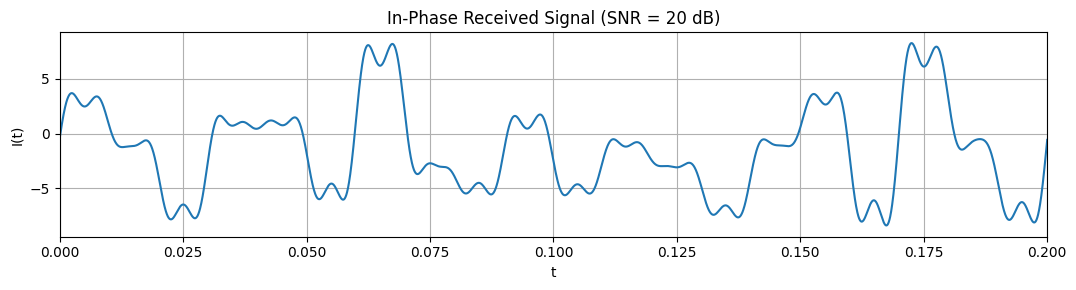

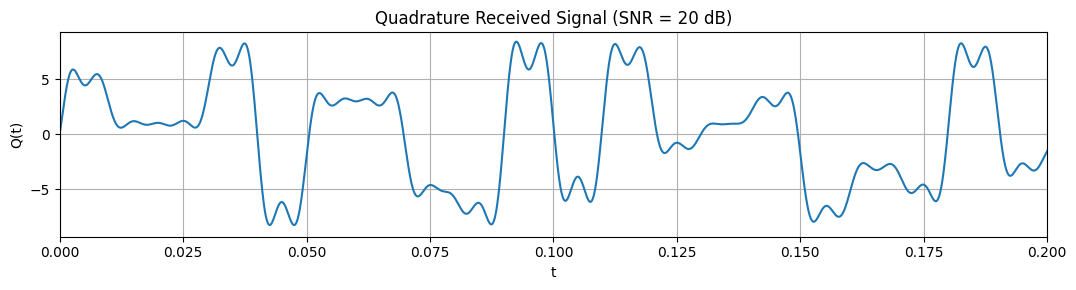

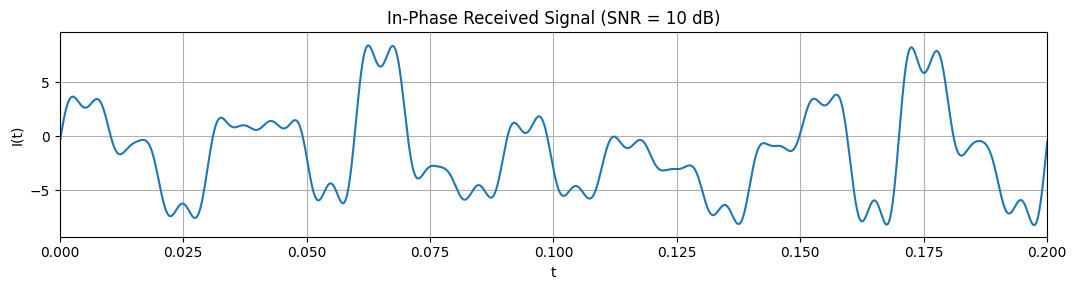

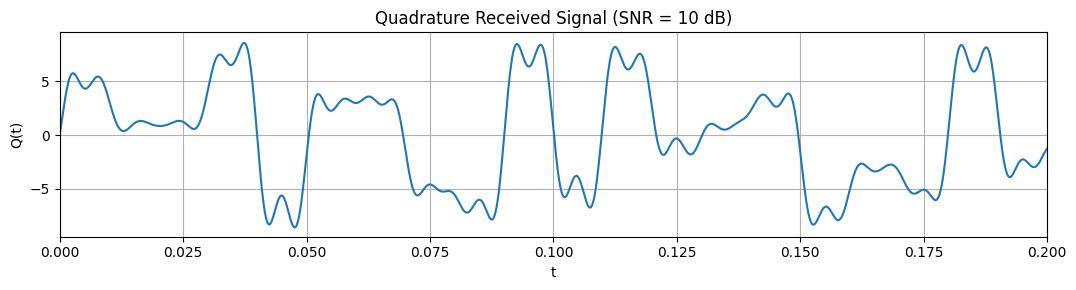

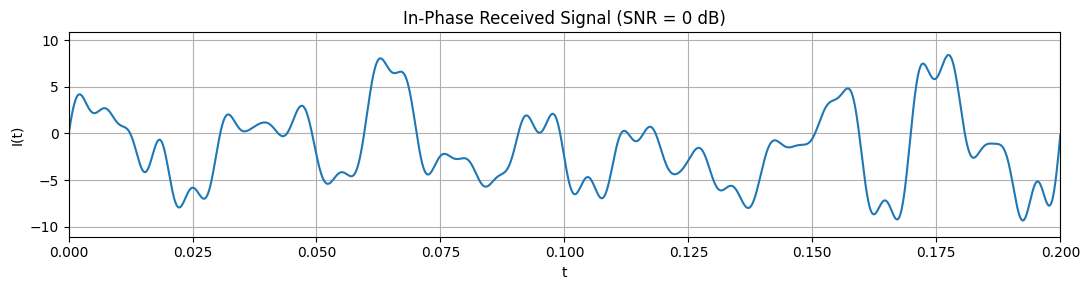

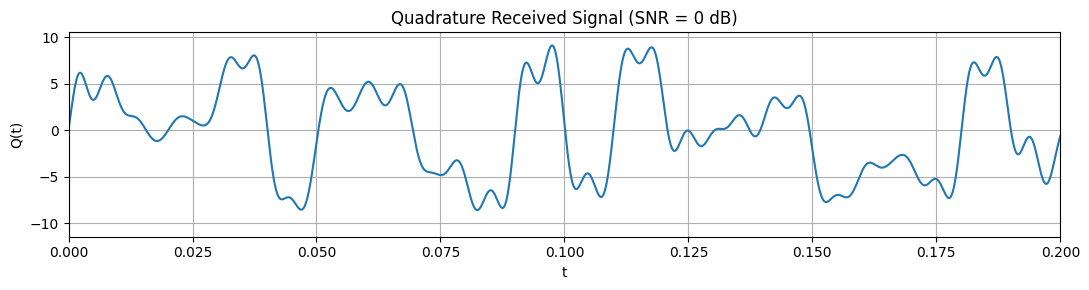

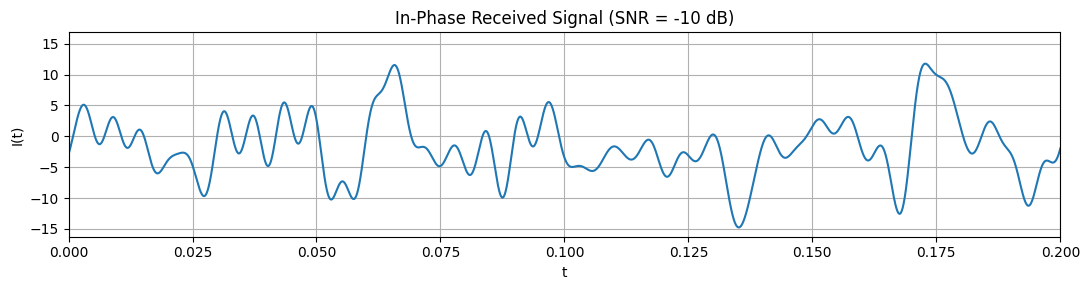

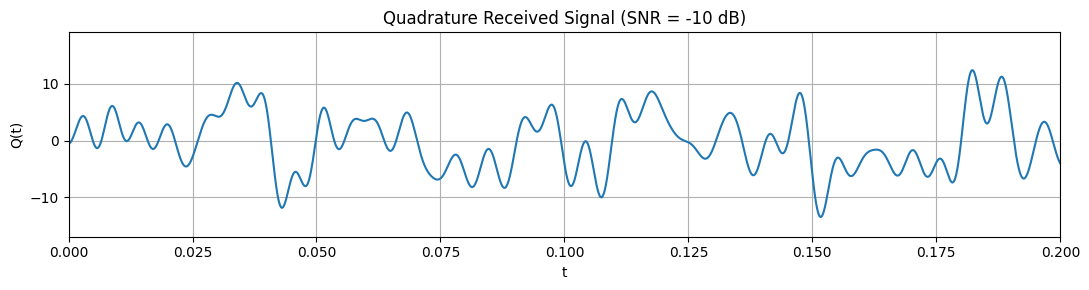

In [183]:
noise_1 = np.random.normal(0,np.sqrt(10**((total_power_dB-20)/10)),modulated_signal.shape[0])             # SNR = 20 dB
noise_2 = np.random.normal(0,np.sqrt(10**((total_power_dB-10)/10)),modulated_signal.shape[0])             # SNR = 10 dB
noise_3 = np.random.normal(0,np.sqrt(10**((total_power_dB)/10)),modulated_signal.shape[0])                # SNR = 0  dB
noise_4 = np.random.normal(0,np.sqrt(10**((total_power_dB+10)/10)),modulated_signal.shape[0])             # SNR = -10 dB

received_signal1 = modulated_signal + noise_1
received_signal2 = modulated_signal + noise_2
received_signal3 = modulated_signal + noise_3
received_signal4 = modulated_signal + noise_4

b_bp , a_bp = butter(7, [800,1200], btype='bandpass', fs=fs)
b_lp , a_lp = butter(9, 200, btype='low', fs=fs)

bandpass_filtered1 = filtfilt(b_bp, a_bp, received_signal1)
bandpass_filtered2 = filtfilt(b_bp, a_bp, received_signal2)
bandpass_filtered3 = filtfilt(b_bp, a_bp, received_signal3)
bandpass_filtered4 = filtfilt(b_bp, a_bp, received_signal4)

demodulated1_I = 2*np.cos(2*np.pi*fc*t) * bandpass_filtered1
demodulated2_I = 2*np.cos(2*np.pi*fc*t) * bandpass_filtered2
demodulated3_I = 2*np.cos(2*np.pi*fc*t) * bandpass_filtered3
demodulated4_I = 2*np.cos(2*np.pi*fc*t) * bandpass_filtered4
demodulated1_Q = 2*np.sin(2*np.pi*fc*t) * bandpass_filtered1
demodulated2_Q = 2*np.sin(2*np.pi*fc*t) * bandpass_filtered2
demodulated3_Q = 2*np.sin(2*np.pi*fc*t) * bandpass_filtered3
demodulated4_Q = 2*np.sin(2*np.pi*fc*t) * bandpass_filtered4

lowpass_filtered1_I = filtfilt(b_lp, a_lp, demodulated1_I)
lowpass_filtered1_Q = filtfilt(b_lp, a_lp, demodulated1_Q)
lowpass_filtered2_I = filtfilt(b_lp, a_lp, demodulated2_I)
lowpass_filtered2_Q = filtfilt(b_lp, a_lp, demodulated2_Q)
lowpass_filtered3_I = filtfilt(b_lp, a_lp, demodulated3_I)
lowpass_filtered3_Q = filtfilt(b_lp, a_lp, demodulated3_Q)
lowpass_filtered4_I = filtfilt(b_lp, a_lp, demodulated4_I)
lowpass_filtered4_Q = filtfilt(b_lp, a_lp, demodulated4_Q)

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered1_I)
plt.title('In-Phase Received Signal (SNR = 20 dB)')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered1_Q)
plt.title('Quadrature Received Signal (SNR = 20 dB)')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered2_I)
plt.title('In-Phase Received Signal (SNR = 10 dB)')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered2_Q)
plt.title('Quadrature Received Signal (SNR = 10 dB)')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered3_I)
plt.title('In-Phase Received Signal (SNR = 0 dB)')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered3_Q)
plt.title('Quadrature Received Signal (SNR = 0 dB)')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered4_I)
plt.title('In-Phase Received Signal (SNR = -10 dB)')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(t,lowpass_filtered4_Q)
plt.title('Quadrature Received Signal (SNR = -10 dB)')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.grid(True)
plt.xlim(0,0.2)
plt.tight_layout()
plt.show()

The received message with 20dB SNR:
Number of correct bits: 1194.0
Number of incorrect bits: 6.0
Bit error rate: 0.005
-----------------------------------
The received message with 10dB SNR:
Number of correct bits: 1185.0
Number of incorrect bits: 15.0
Bit error rate: 0.0125
-----------------------------------
The received message with 0dB SNR:
Number of correct bits: 1083.0
Number of incorrect bits: 117.0
Bit error rate: 0.0975
-----------------------------------
The received message with -10dB SNR:
Number of correct bits: 834.0
Number of incorrect bits: 366.0
Bit error rate: 0.305
-----------------------------------


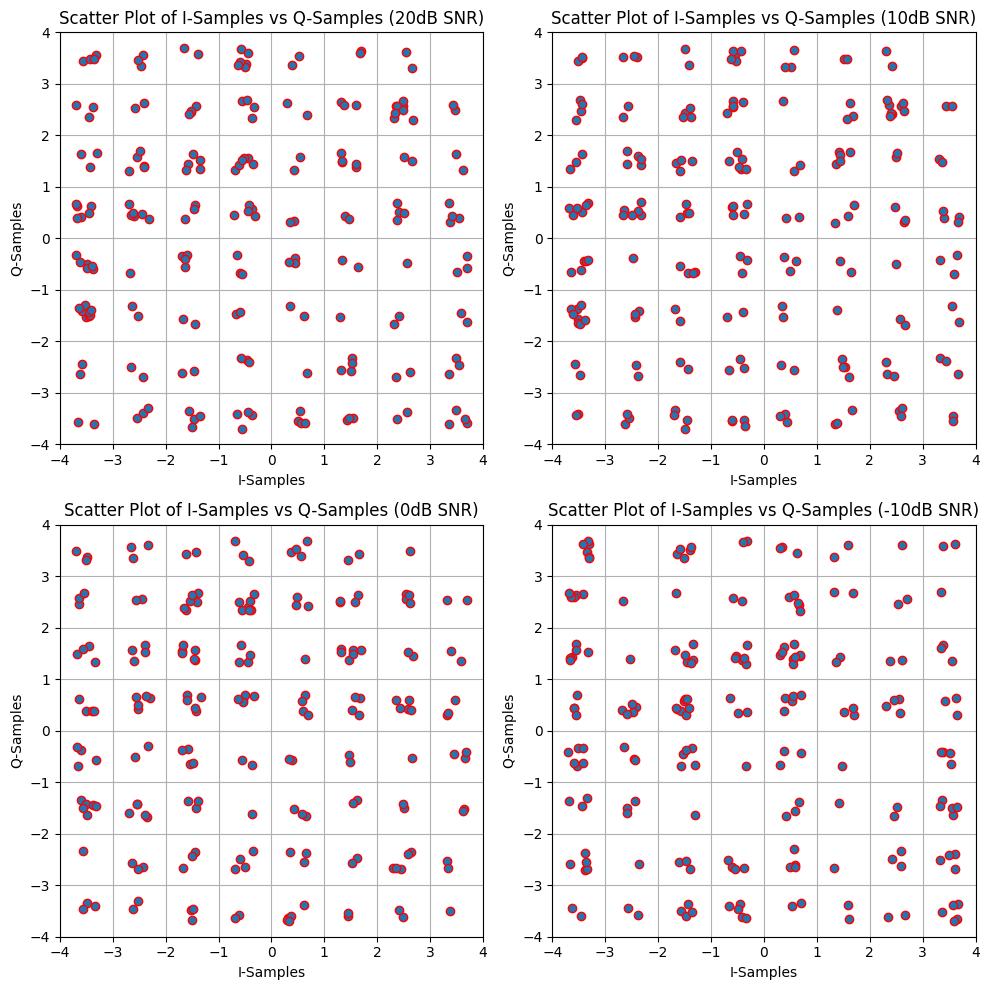

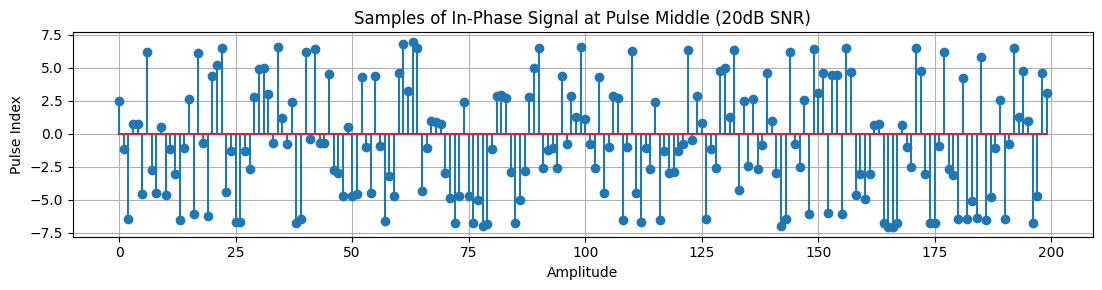

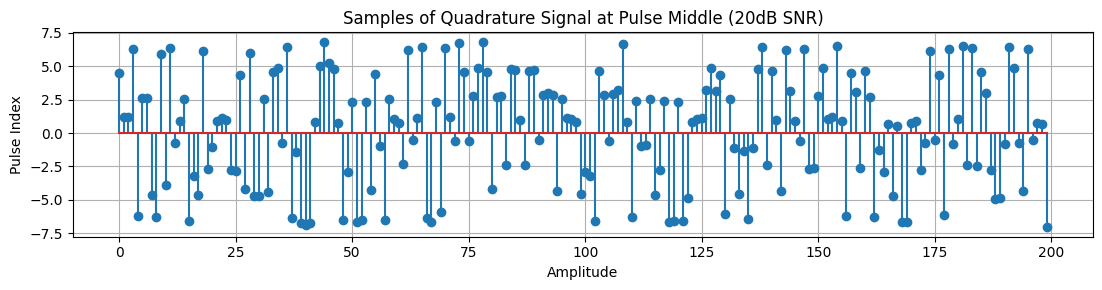

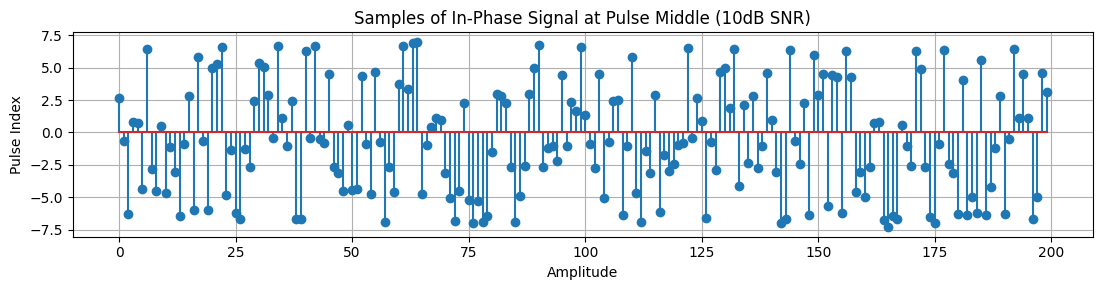

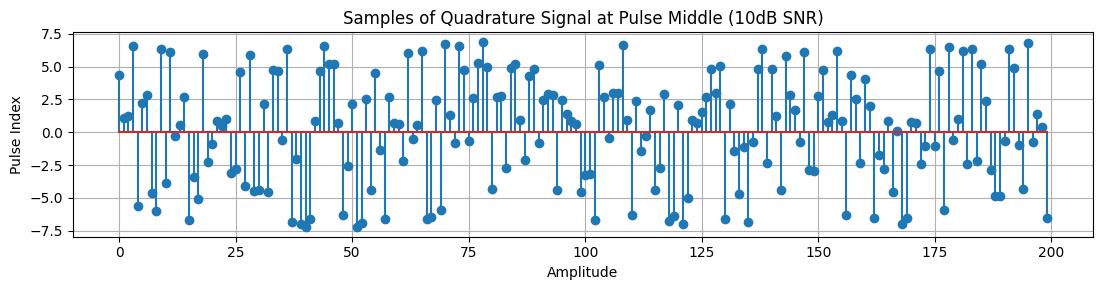

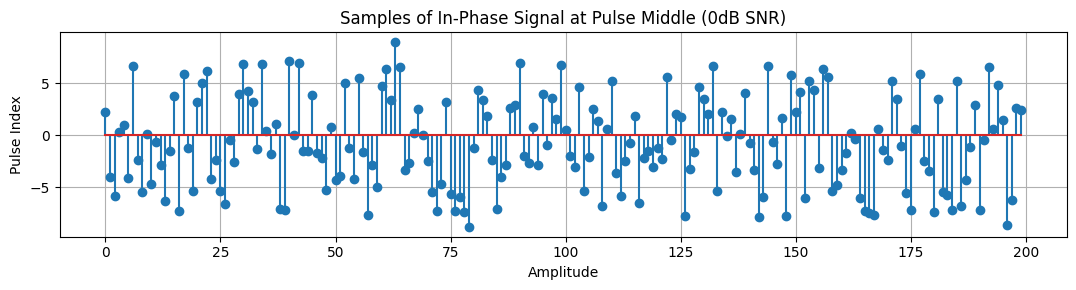

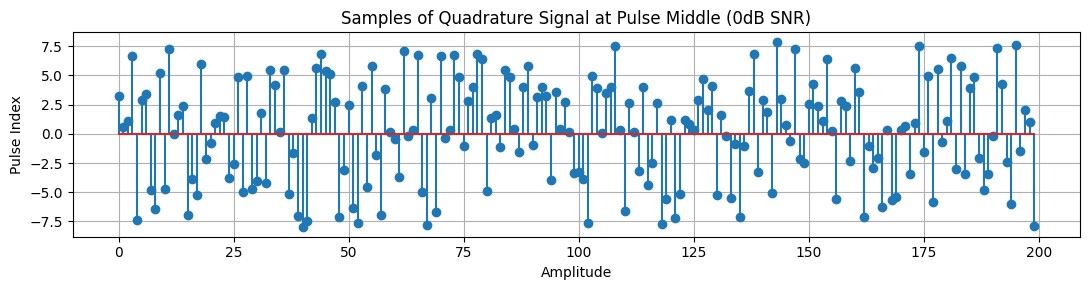

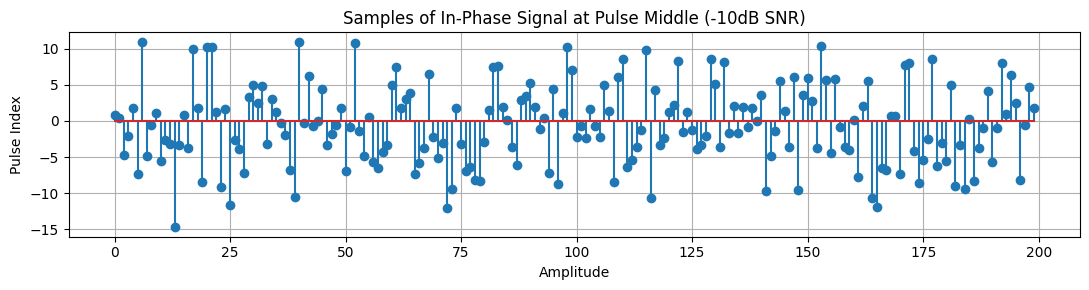

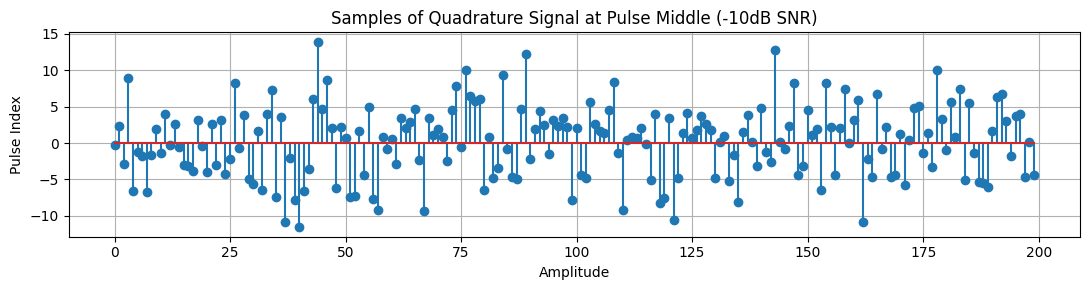

In [184]:
def decision_maker(In_Phase_Signal,Quadrature_Signal,Ts):
    number_of_symbols = int(t[t.shape[0]-1] / Ts)
    period = int(t.shape[0] / number_of_symbols)
    Td = int(period/2)
    signal = np.array([])
    si = np.zeros(number_of_symbols)
    sq = np.zeros(number_of_symbols)
    sampled_I = np.zeros(number_of_symbols)
    sampled_Q = np.zeros(number_of_symbols)

    for i in range(number_of_symbols):
        sampled_I[i] = In_Phase_Signal[Td+i*period]
        sampled_Q[i] = Quadrature_Signal[Td+i*period]
        
        if(sampled_I[i] >= 6):
            I = [1,0,0]
            si[i] = 3.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] >= 4 and sampled_I[i] < 6):
            I = [1,0,1]
            si[i] = 2.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] >= 2 and sampled_I[i] < 4):
            I = [1,1,1]
            si[i] = 1.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] >= 0 and sampled_I[i] < 2):
            I = [1,1,0]
            si[i] = 0.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] >= -2 and sampled_I[i] < 0):
            I = [0,1,0]
            si[i] = -0.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] >= -4 and sampled_I[i] < -2):
            I = [0,1,1]
            si[i] = -1.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] >= -6 and sampled_I[i] < -4):
            I = [0,0,1]
            si[i] = -2.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_I[i] < -6):
            I = [0,0,0]
            si[i] = -3.5 + np.random.uniform(-0.2,0.2)

        if(sampled_Q[i] >= 6):
            Q = [1,0,0]
            sq[i] = 3.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] >= 4 and sampled_Q[i] < 6):
            Q = [1,0,1]
            sq[i] = 2.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] >= 2 and sampled_Q[i] < 4):
            Q = [1,1,1]
            sq[i] = 1.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] >= 0 and sampled_Q[i] < 2):
            Q = [1,1,0]
            sq[i] = 0.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] >= -2 and sampled_Q[i] < 0):
            Q = [0,1,0]
            sq[i] = -0.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] >= -4 and sampled_Q[i] < -2):
            Q = [0,1,1]
            sq[i] = -1.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] >= -6 and sampled_Q[i] < -4):
            Q = [0,0,1]
            sq[i] = -2.5 + np.random.uniform(-0.2,0.2)
        elif(sampled_Q[i] < -6):
            Q = [0,0,0]
            sq[i] = -3.5 + np.random.uniform(-0.2,0.2)
        
        symbol = np.concatenate((I, Q))
        signal = np.concatenate((signal, symbol))

    return signal, si, sq, sampled_I, sampled_Q

read_message1, si1, sq1, sampled_I1, sampled_Q1 = decision_maker(lowpass_filtered1_I,lowpass_filtered1_Q,Ts)
read_message2, si2, sq2, sampled_I2, sampled_Q2 = decision_maker(lowpass_filtered2_I,lowpass_filtered2_Q,Ts)
read_message3, si3, sq3, sampled_I3, sampled_Q3 = decision_maker(lowpass_filtered3_I,lowpass_filtered3_Q,Ts)
read_message4, si4, sq4, sampled_I4, sampled_Q4 = decision_maker(lowpass_filtered4_I,lowpass_filtered4_Q,Ts)

print("The received message with 20dB SNR:")
print(f"Number of correct bits: {1200-np.sum(np.abs(read_message1-message))}")
print(f"Number of incorrect bits: {np.sum(np.abs(read_message1-message))}")
print(f"Bit error rate: {np.sum(np.abs(read_message1-message))/1200}")
print("-----------------------------------")
print("The received message with 10dB SNR:")
print(f"Number of correct bits: {1200-np.sum(np.abs(read_message2-message))}")
print(f"Number of incorrect bits: {np.sum(np.abs(read_message2-message))}")
print(f"Bit error rate: {np.sum(np.abs(read_message2-message))/1200}")
print("-----------------------------------")
print("The received message with 0dB SNR:")
print(f"Number of correct bits: {1200-np.sum(np.abs(read_message3-message))}")
print(f"Number of incorrect bits: {np.sum(np.abs(read_message3-message))}")
print(f"Bit error rate: {np.sum(np.abs(read_message3-message))/1200}")
print("-----------------------------------")
print("The received message with -10dB SNR:")
print(f"Number of correct bits: {1200-np.sum(np.abs(read_message4-message))}")
print(f"Number of incorrect bits: {np.sum(np.abs(read_message4-message))}")
print(f"Bit error rate: {np.sum(np.abs(read_message4-message))/1200}")
print("-----------------------------------")

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(si1,sq1,edgecolors='red')
plt.title("Scatter Plot of I-Samples vs Q-Samples (20dB SNR)")
plt.xlabel('I-Samples')
plt.ylabel('Q-Samples')
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.subplot(2,2,2)
plt.scatter(si2,sq2,edgecolors='red')
plt.title("Scatter Plot of I-Samples vs Q-Samples (10dB SNR)")
plt.xlabel('I-Samples')
plt.ylabel('Q-Samples')
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.subplot(2,2,3)
plt.scatter(si3,sq3,edgecolors='red')
plt.title("Scatter Plot of I-Samples vs Q-Samples (0dB SNR)")
plt.xlabel('I-Samples')
plt.ylabel('Q-Samples')
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.subplot(2,2,4)
plt.scatter(si4,sq4,edgecolors='red')
plt.title("Scatter Plot of I-Samples vs Q-Samples (-10dB SNR)")
plt.xlabel('I-Samples')
plt.ylabel('Q-Samples')
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_I1)
plt.title("Samples of In-Phase Signal at Pulse Middle (20dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_Q1)
plt.title("Samples of Quadrature Signal at Pulse Middle (20dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_I2)
plt.title("Samples of In-Phase Signal at Pulse Middle (10dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_Q2)
plt.title("Samples of Quadrature Signal at Pulse Middle (10dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_I3)
plt.title("Samples of In-Phase Signal at Pulse Middle (0dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_Q3)
plt.title("Samples of Quadrature Signal at Pulse Middle (0dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_I4)
plt.title("Samples of In-Phase Signal at Pulse Middle (-10dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,3))
plt.stem(sampled_Q4)
plt.title("Samples of Quadrature Signal at Pulse Middle (-10dB SNR)")
plt.xlabel('Amplitude')
plt.ylabel('Pulse Index')
plt.grid(True)
plt.tight_layout()
plt.show()


As we can see, as SNR increases, bit error rate also increases :)

# Question 3

### Secure Communication System for Covert Messaging

In critical scenarios, such as covert operations, secure and discreet communication systems are essential to prevent interception and ensure confidentiality. Here’s how such a system can be implemented:

---

#### 1. Encoding the Message:

- **Polar Encoding**: 
  - Each bit of the message is represented as +1 or -1, making it resistant to noise while ensuring energy efficiency and signal balance. This approach makes the signal easier to handle during transmission and decoding.

- **Using a Secret Key**:
  - A **unique 128-bit key** (e.g., `[1, 0, 1, 1, ..., 0, 1, 0]`) is used to modulate the signal. This key is shared only between the sender and receiver, ensuring the encoded signal is secure and undecipherable without it.

- **Stealth Transmission**:
  - The power of the encoded signal is reduced to remain below typical noise levels (e.g., between -100 dBm/Hz and -130 dBm/Hz). This ensures the signal blends seamlessly with environmental noise, making it nearly invisible to potential eavesdroppers.

---

#### 2. Transmitting and Decoding the Signal:

- **Adding Realistic Noise**:
  - To simulate real-world conditions, the transmitted signal is mixed with Gaussian noise. This noise mimics environmental interference and tests the system's robustness.

- **Decoding the Message**:
  - At the receiver’s end, the signal is decoded using the same **128-bit key**. By aligning with the transmitted signal, the key allows the receiver to recover the original message:
    - If the decoded value exceeds a set threshold, it’s interpreted as 1.
    - Otherwise, it’s interpreted as 0.
  - **Security Guarantee**: Without the correct key, any decoding attempt results in random noise, making the message impossible to recover.

---

### **What You’ll Do:**

1. Encode the hexadecimal string `48656c6c6f` (representing "Hello") using polar encoding and a **128-bit key**.
2. Transmit the signal in a simulated environment with realistic Gaussian noise (-130 dBm/Hz).
3. Set a decoding threshold that ensures accurate message recovery despite the noise.
4. Decode the received signal and verify it matches the original message, demonstrating the system’s effectiveness and security.

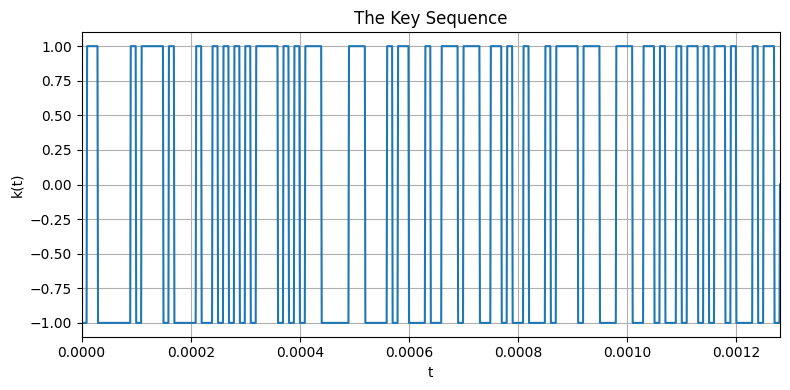

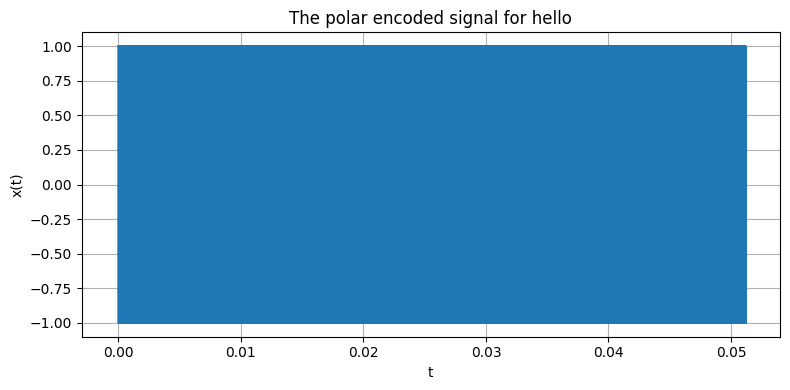

In [185]:
message = np.array([0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,1,1])
polar_modulated = np.zeros(message.shape[0])

for i in range(message.shape[0]):
    if message[i] == 0:
        polar_modulated[i] = -1
    else:
        polar_modulated[i] = 1

key = np.random.randint(0,2,128)
key = 2*key - 1

def draw_key_pulse(x,key):
    if (x< 0.00128):
        n = int(x/0.00001)
        return key[n]
    return 0

t = np.linspace(0,0.0512,51200)
key_pulse = np.zeros(t.shape[0])

for i in range(t.shape[0]):
    key_pulse[i] = draw_key_pulse(t[i],key)

plt.figure(figsize=(8,4))
plt.plot(t,key_pulse)
plt.title('The Key Sequence')
plt.xlabel('t')
plt.ylabel('k(t)')             
plt.grid(True)
plt.xlim(0,0.00128)
             
plt.tight_layout()
plt.show()

key_pulse = key_pulse[0:1280]

encoded_message = np.array([])
for i in range(message.shape[0]):
    if message[i] == 1:
        encoded_message = np.concatenate((encoded_message, key_pulse))
    else:
        encoded_message = np.concatenate((encoded_message, -1*key_pulse))

plt.figure(figsize=(8,4))
plt.plot(t,encoded_message)
plt.title('The polar encoded signal for hello')
plt.xlabel('t')
plt.ylabel('x(t)')             
plt.grid(True)
plt.xlim(-0.003,0.054)
             
plt.tight_layout()
plt.show()


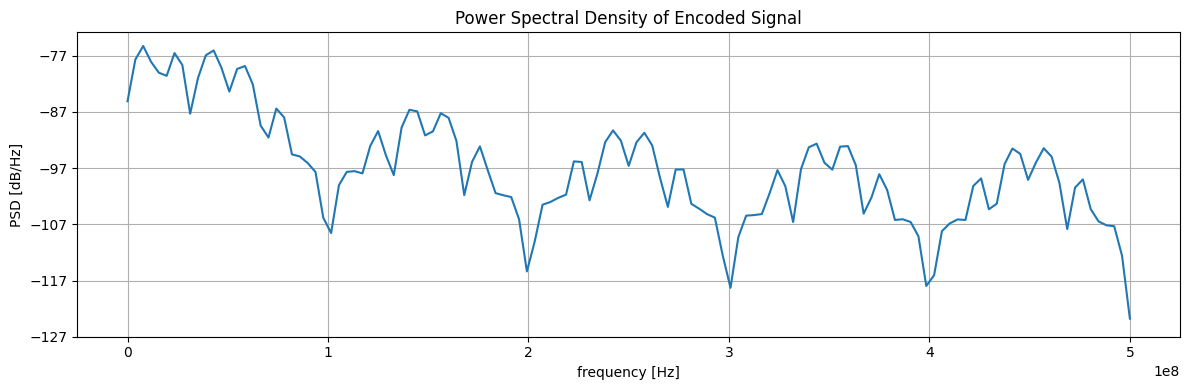

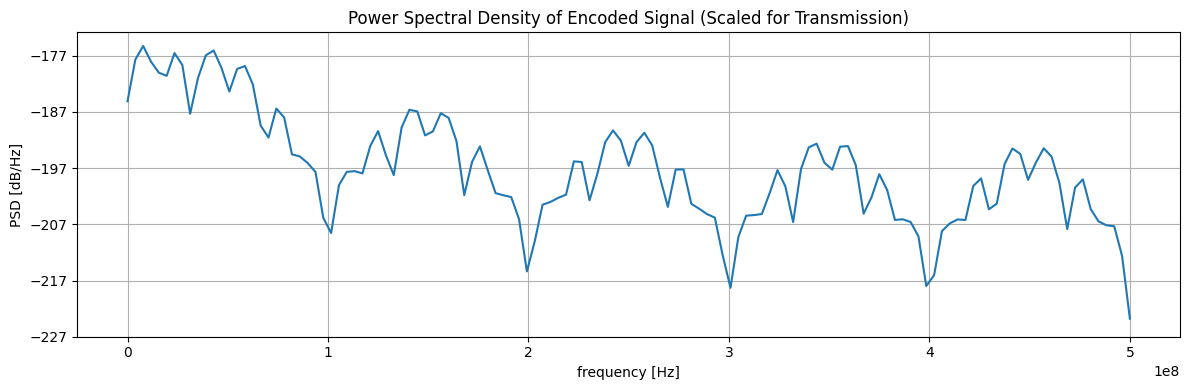

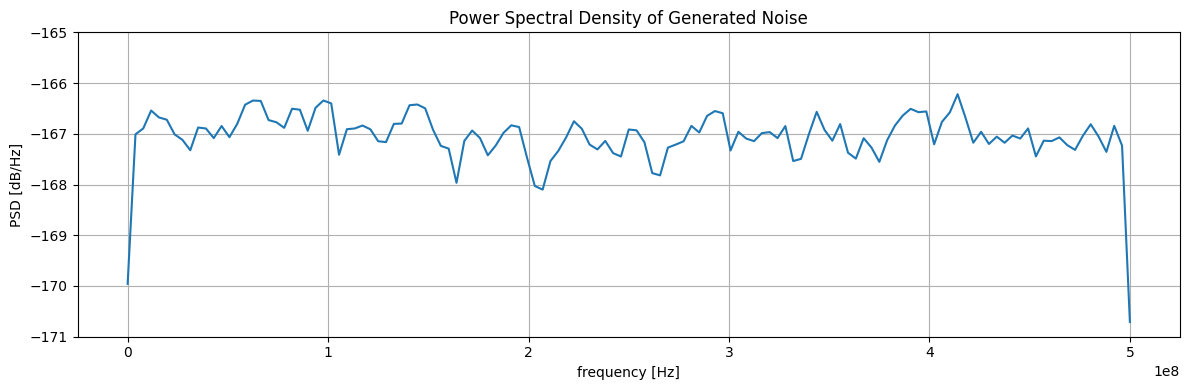

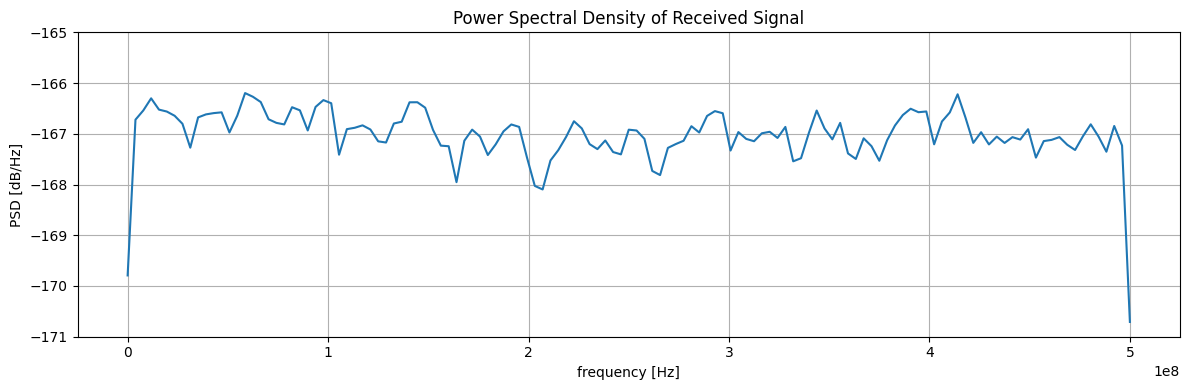

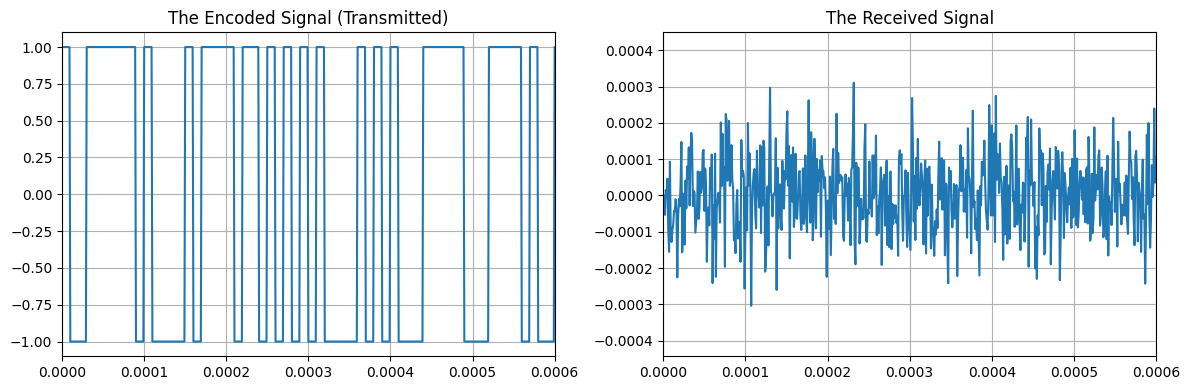

In [186]:
plt.figure(figsize=(12,4))
plt.psd(encoded_message,Fs=1e9)
plt.title('Power Spectral Density of Encoded Signal')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.tight_layout()
plt.show()

encoded_message_scaled = encoded_message * 1e-5

plt.figure(figsize=(12,4))
plt.psd(encoded_message_scaled,Fs=1e9)
plt.title('Power Spectral Density of Encoded Signal (Scaled for Transmission)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.tight_layout()
plt.show()

AWGN = np.random.normal(0, pow(10,-4), size=encoded_message.shape[0])

plt.figure(figsize=(12,4))
plt.psd(AWGN,Fs=1e9)
plt.title('Power Spectral Density of Generated Noise')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.tight_layout()
plt.show()

received_signal = encoded_message_scaled + AWGN

plt.figure(figsize=(12,4))
plt.psd(received_signal,Fs=1e9)
plt.title('Power Spectral Density of Received Signal')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(t,encoded_message)
plt.title('The Encoded Signal (Transmitted)')
plt.grid(True)
plt.xlim(0,0.0006)

plt.subplot(1, 2, 2)
plt.plot(t,received_signal)
plt.title('The Received Signal')
plt.grid(True)
plt.xlim(0,0.0006)
             
plt.tight_layout()
plt.show()

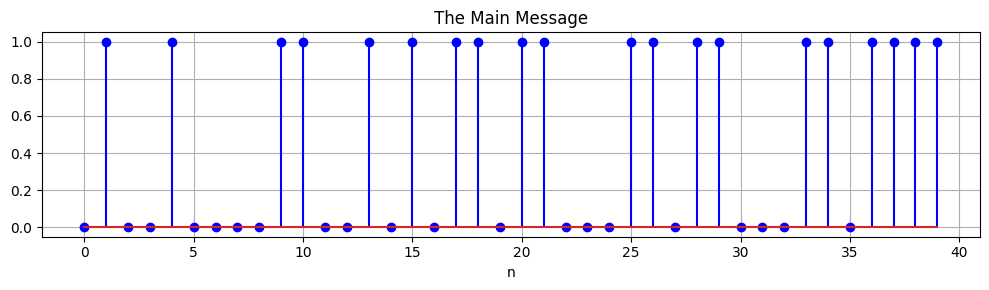

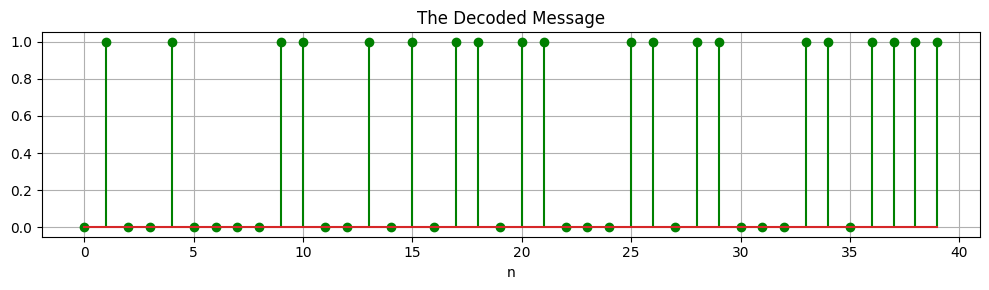

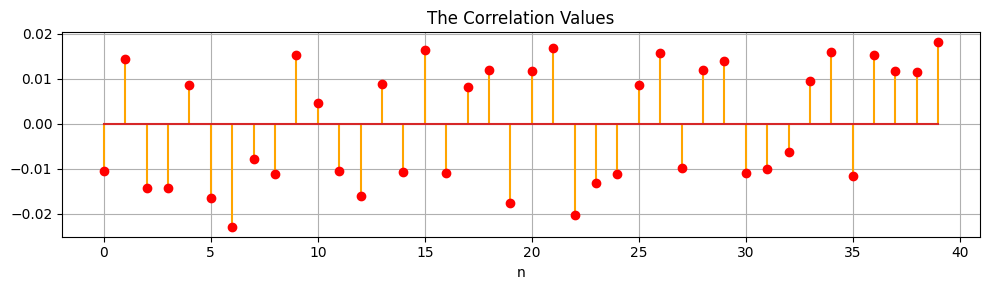

In [187]:
decoded_message = np.zeros(message.shape[0])
correlation_values = np.zeros(message.shape[0])

for i in range(message.shape[0]):
    decoded = received_signal[i*1280:(i+1)*1280] * key_pulse
    correlation_values[i] = np.sum(decoded)
    if correlation_values[i]>0:
        decoded_message[i] = 1


plt.figure(figsize=(10,3))
plt.stem(message,markerfmt='blue',linefmt='blue')
plt.title('The Main Message')
plt.xlabel('n')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.stem(decoded_message,markerfmt='green',linefmt='green')
plt.title('The Decoded Message')
plt.xlabel('n')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.stem(correlation_values,markerfmt='red',linefmt='orange')
plt.title('The Correlation Values')
plt.xlabel('n')
plt.grid(True)
plt.tight_layout()
plt.show()

### Decoding with an Incorrect Key

In this part, you will test how the communication system behaves when an incorrect key is used for decoding the transmitted message. This step will highlight the security of the system and its resistance to unauthorized access.

#### Instructions:

1. **Generate an Incorrect Key**:
   - Create a new random 128-bit key that is different from the original encoding key.

2. **Create a Pulse Template**:
   - Use this incorrect key to generate a pulse template (`incorrect_pulse`).

3. **Decode the Signal**:
   - Attempt to decode the received signal (`send_signal`) using the incorrect pulse template.

4. **Evaluate the Decoding**:
   - Compare the decoded bits (`decoded_bits_incorrect`) with the original binary message.
   - Count how many bits were decoded correctly and how many were decoded incorrectly.

5. **Analyze the Results**:
   - Observe and record how using the incorrect key impacts the decoding process.

---

### Questions

1. **Key Effectiveness**:
   - How many bits were decoded correctly and incorrectly when using the wrong key? 
   - How does this result demonstrate the system’s security against unauthorized decoding?

2. **Impact of Key Length**:
   - What role does the length of the key play in the system’s security? For example, if the key length were increased to 256 bits, how would it enhance the system's resistance to unauthorized access?

3. **Pulse Duration and Security**:
   - Discuss how the duration of each pulse (`pulse_duration`) affects the system’s security and reliability. For instance:
     - Shorter pulses may make the signal harder to intercept but more susceptible to noise.
     - Longer pulses could improve noise resistance but make the signal more detectable.


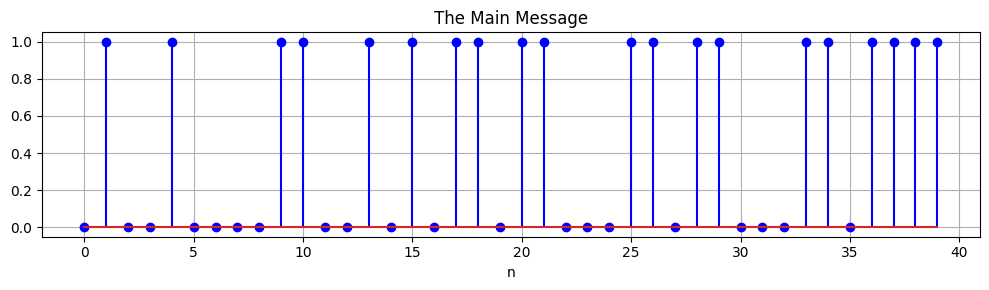

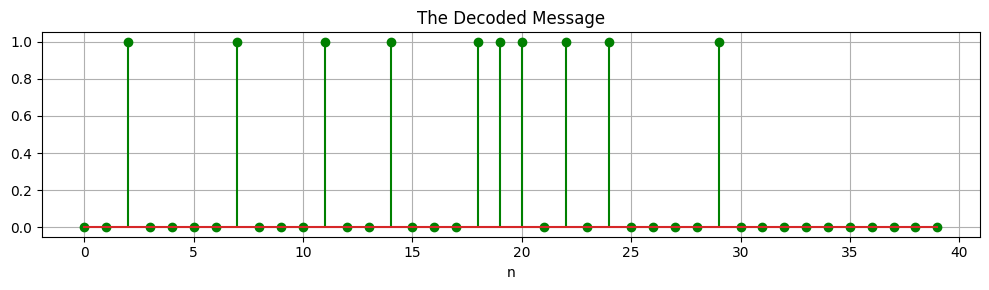

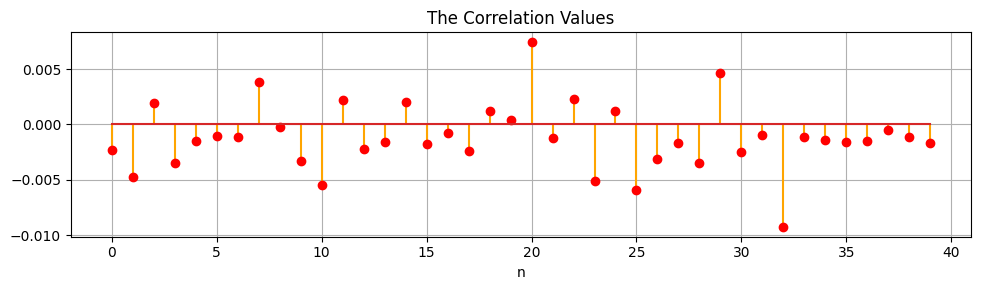

Using Incorrect Key
Total Bits: 40
Correctly Received Bits: 16
Incorrectly Received Bits: 24


In [188]:
incorrect_key = np.random.randint(0,2,128)
incorrect_key = 2*incorrect_key - 1

incorrect_key_pulse = np.zeros(t.shape[0])

for i in range(t.shape[0]):
    incorrect_key_pulse[i] = draw_key_pulse(t[i],incorrect_key)

incorrect_key_pulse = incorrect_key_pulse[0:1280]

incorrect_decoded_message = np.zeros(message.shape[0])
incorrect_correlation_values = np.zeros(message.shape[0])

for i in range(message.shape[0]):
    decoded = received_signal[i*1280:(i+1)*1280] * incorrect_key_pulse
    incorrect_correlation_values[i] = np.sum(decoded)
    if incorrect_correlation_values[i]>0:
        incorrect_decoded_message[i] = 1

plt.figure(figsize=(10,3))
plt.stem(message,markerfmt='blue',linefmt='blue')
plt.title('The Main Message')
plt.xlabel('n')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.stem(incorrect_decoded_message,markerfmt='green',linefmt='green')
plt.title('The Decoded Message')
plt.xlabel('n')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.stem(incorrect_correlation_values,markerfmt='red',linefmt='orange')
plt.title('The Correlation Values')
plt.xlabel('n')
plt.grid(True)
plt.tight_layout()
plt.show()

difference = decoded_message - incorrect_decoded_message
wrong_bits = np.sum(np.abs(difference))
correct_bits = 40 - wrong_bits

print("Using Incorrect Key")
print("Total Bits: 40")
print(f"Correctly Received Bits: {int(correct_bits)}")
print(f"Incorrectly Received Bits: {int(wrong_bits)}")

#### Question: Impact of Key Length

The length of the key is a fundamental parameter in determining the security of a cryptographic system. Here's how increasing the key length from 128 bits to 256 bits enhances security:

1. **Exponential Growth of Key Space**
2. **Protection Against Quantum Computing Attacks**

#### Question: Pulse Duration and Security

The duration of each pulse plays a critical role in determining both the security and reliability of a communication system. Adjusting the pulse duration involves trade-offs between signal robustness and stealthiness, as described below.

1. **Shorter Pulse Durations**
    - Advantages
        - Short pulses concentrate energy over a very narrow time window, reducing the time available for an adversary to detect and capture the signal.
        - The high-frequency components associated with shorter pulses make interception more challenging without specialized, high-bandwidth equipment.
        - Short pulses inherently occupy a wider bandwidth due to the time-bandwidth product, which spreads the signal energy and makes it less likely to be distinguishable from noise in the frequency domain.
    - Disadvantages
        - Shorter pulses are more prone to distortion from noise, interference, and multipath effects, reducing the reliability of the transmitted signal.
        - Generating and detecting short pulses requires precision timing and high-performance components, which may increase system complexity and cost.
2. **Longer Pulse Durations**
    - Advantages
        - Longer pulses average out noise over a larger time window, increasing the signal-to-noise ratio (SNR) and improving reliability in noisy environments.
        - Longer pulses are easier to generate and detect using standard equipment, reducing design complexity and cost.
    - Disadvantages
        - Longer pulses concentrate energy in a smaller bandwidth, making the signal more distinguishable from noise in both time and frequency domains, increasing the risk of interception.
        - Longer pulses reduce the rate at which information can be transmitted, lowering overall system efficiency.

### Bonus 

Explore methods to find the correct key without prior knowledge. This requires considering the following questions:

1. **Brute Force Attack**:
   - Estimate how many possible 128-bit keys exist. How feasible is it to try all combinations within a reasonable time frame, given modern computational capabilities?

2. **Signal Analysis**:
   - Propose a method to analyze the received signal (`send_signal`) and deduce patterns that might help infer the correct key. For example:
     - Can statistical correlations between the signal and potential keys reveal useful information?
     - Are there any weaknesses in the system that could be exploited, such as predictable patterns in the encoding or key generation?

3. **Optimized Key Search**:
   - Suggest a strategy to narrow down the possible key space, such as:
     - Using machine learning to classify potential keys based on the decoded output.
     - Leveraging properties of the transmitted signal (e.g., PSD or time-domain patterns) to guide the search.

4. **Security Recommendations**:
   - Reflect on the findings of your attack simulation. How would you improve the system to mitigate vulnerabilities? For instance:
     - Would increasing the key length or adding additional layers of encryption make the system more secure?
     - Could randomizing pulse templates or encoding schemes further protect against attacks?

Document your approach and findings, and propose at least one concrete way to enhance the system’s resistance to attacks.

### Answers to Bonus Questions

Note: I used the help of chatgpt-4o for answering these questions :)

1. **Brute Force Attack**:
   - Estimating the Number of 128-bit Keys: A 128-bit key space contains $2^{128}$ possible keys, approximately $3.4 * 10^{38}$
   - Feasibility of Exhaustive Search: Even with a modern supercomputer capable of testing $10^{15}$ keys per second, it would take approximately $1.08*10^{16}$ years.


2. **Signal Analysis**:
   - Methodology: Analyze the received signal for exploitable patterns or correlations. This might involve:
        - Using cross-correlation between the received signal and potential key-derived signals to detect alignment.
        - Examining the entropy of the signal to identify non-random patterns or biases.
        - Checking for periodicity in the encoding or repetition in key generation.
        - Analyzing the key generation algorithm (if partially known) for structural weaknesses, such as reliance on a weak random number generator.
    - Example Techniques:
        - Power Spectral Density (PSD): Identify peaks in the frequency domain that suggest repeating patterns, possibly due to suboptimal key mixing.
        - Time-Domain Patterns: Detect non-random structures in signal transitions, which might reveal aspects of the key.


3. **Optimized Key Search**:
   - Train a model (e.g., neural network) to classify potential keys based on decoded outputs.
   - Use a reinforcement learning agent to prioritize promising key candidates based on partial decryption success.
   - Leverage information about the transmitted signal (e.g., correlation with known plaintexts).
   - Apply differential analysis techniques to exploit key-dependent variations in the output.


4. **Security Recommendations**:
   - Key Length:
        - Increase the key length from 128 bits to 256 bits. This exponentially increases the search space to $2^{256}$ , making brute force infeasible even with hypothetical future technology.
   - Stronger Key Generation:
        - Use cryptographically secure random number generators to prevent biases in key creation.
        - Introduce frequent rekeying mechanisms to limit exposure even if a key is partially compromised.
   - Encoding and Transmission:
        - Randomize pulse templates and encoding schemes to prevent statistical attacks.
        - Add noise or dummy signals to increase the difficulty of signal-based analysis.
   - Multi-layer Encryption:
        - Combine multiple encryption layers (e.g., AES with another lightweight cipher) to strengthen resistance against attacks targeting a single layer.
